# Setup

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# install kaggle
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nhungngo58","key":"a033398bdd2020334fa0ae1cbb5b897d"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                      COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           7827        236  1.0              
mattop/alcohol-consumption-per-capita-2016                     Alcohol Consumption Per Capita 2016                   4KB  2022-12-09 00:03:11            584         23  1.0              
thedevastator/jobs-dataset-from-glassdoor                      Salary Prediction                                     3MB  2022-11-16 13:52:31           5023        113  1.0              
swap

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json
# to list all datasets in kaggle
! kaggle datasets list


mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                      COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           7827        236  1.0              
mattop/alcohol-consumption-per-capita-2016                     Alcohol Consumption Per Capita 2016                   4KB  2022-12-09 00:03:11            584         23  1.0              
thedevastator/jobs-dataset-from-glassdoor                      Salary Prediction                                     3MB  2022-11-16 13

In [ ]:
!kaggle datasets download -d berkayalan/retail-sales-data

 92% 80.0M/86.5M [00:00<00:00, 123MB/s]
100% 86.5M/86.5M [00:00<00:00, 118MB/s]


In [ ]:
! unzip retail-sales-data

Archive:  retail-sales-data.zip
  inflating: product_hierarchy.csv   
  inflating: sales.csv/sales.csv     
  inflating: store_cities.csv        


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
sales_df = pd.read_csv('sales.csv/sales.csv')


product_df=pd.read_csv('product_hierarchy.csv')


store_cities_df=pd.read_csv('store_cities.csv')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
product_df = product_df.drop(columns=['hierarchy1_id','hierarchy2_id','hierarchy3_id','hierarchy4_id','hierarchy5_id'])
sales_df = sales_df.drop(columns=['promo_bin_1','promo_bin_2','promo_discount_2','promo_discount_type_2','promo_type_1','promo_type_2'])


In [ ]:
sales_df.tail(20)

product_id store_id        date  sales  revenue  stock  price
19454818      P0748    S0062  2019-12-29    NaN      NaN    NaN   18.9
19454819      P0748    S0066  2019-12-29    NaN      NaN    NaN   18.9
19454820      P0748    S0067  2019-12-29    NaN      NaN    NaN   18.9
19454821      P0748    S0071  2019-12-29    NaN      NaN    NaN   18.9
19454822      P0748    S0072  2019-12-29    NaN      NaN    NaN   18.9
19454823      P0748    S0085  2019-12-29    NaN      NaN    NaN   18.9
19454824      P0748    S0094  2019-12-29    NaN      NaN    NaN   18.9
19454825      P0748    S0097  2019-12-29    NaN      NaN    NaN   18.9
19454826      P0748    S0101  2019-12-29    NaN      NaN    NaN   18.9
19454827      P0748    S0104  2019-12-29    NaN      NaN    NaN   18.9
19454828      P0748    S0108  2019-12-29    NaN      NaN    NaN   18.9
19454829      P0748    S0110  2019-12-29    NaN      NaN    NaN   18.9
19454830      P0748    S0112  2019-12-29    NaN      NaN    NaN   18.9
19454831      P0748    S0113  2019-12-29    NaN      NaN    NaN   18.9
19454832      P0748    S0115  2019-12-29    NaN      NaN    NaN   18.9
19454833      P0748    S0125  2019-12-29    NaN      NaN    NaN   18.9
19454834      P0748    S0126  2019-12-29    NaN      NaN    NaN   18.9
19454835      P0748    S0131  2019-12-29    NaN      NaN    NaN   18.9
19454836      P0748    S0132  2019-12-29    NaN      NaN    NaN   18.9
19454837      P0748    S0142  2019-12-29    NaN      NaN    NaN   18.9

### Data Descriptions

This data is collected from a Turkish retail company. Time period is beginning from 2017 to the end of 2019.

* store_id - The unique identifier of a store
* product_id - The unique identifier of a product
* date - Sales date (YYYY-MM-DD)
* sales - Sales quantity
* revenue - Daily total sales revenue
* stock - End of day stock quantity
* price - Product sales price
* promotype1 - Type of promotion applied on channel 1
* promotype2 - Type of promotion applied on channel 2
* product_length - Length of product
* product_depth - Depth of product
* product_width - Width of product
* city_id
* hierarchy1_id
* hierarchy2_id
* hierarchy3_id
* hierarchy4_id
* hierarchy5_id

# Data Cleaning

## Indentify and handle missing values


### Missing value on Sales_df

In [ ]:
df_na = (sales_df.isnull().sum() / len(sales_df)) * 100 
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'miss_rate' :df_na})
missing_data.head()
df_na

sales      6.120647
revenue    6.120647
stock      6.120647
price      2.940045
dtype: float64

**Observation:**

We missing values on sales revenue stock columns from 2019-11-01 to 2019-12-29, therefore, we'll drop those missing values.

We missing values on price columns, we can replace the median price on those missing values

In [ ]:
median = sales_df['price'].median()
median

7.95

In [ ]:
sales_df['price'].fillna(median, inplace=True)

In [ ]:
sales_df = sales_df.dropna()


In [ ]:
sales_df

product_id store_id        date  sales  revenue  stock  price
0             P0001    S0002  2017-01-02    0.0     0.00    8.0   6.25
1             P0001    S0012  2017-01-02    1.0     5.30    0.0   6.25
2             P0001    S0013  2017-01-02    2.0    10.59    0.0   6.25
3             P0001    S0023  2017-01-02    0.0     0.00    6.0   6.25
4             P0001    S0025  2017-01-02    0.0     0.00    1.0   6.25
...             ...      ...         ...    ...      ...    ...    ...
18264071      P0748    S0125  2019-10-31    0.0     0.00   11.0  18.90
18264072      P0748    S0126  2019-10-31    0.0     0.00    4.0  18.90
18264073      P0748    S0131  2019-10-31    0.0     0.00    6.0  18.90
18264074      P0748    S0132  2019-10-31    0.0     0.00    2.0  18.90
18264075      P0748    S0142  2019-10-31    0.0     0.00   16.0  18.90

[18264076 rows x 7 columns]

In [ ]:
total_1 = sales_df.isnull().sum().sort_values(ascending=False)
total_1

product_id    0
store_id      0
date          0
sales         0
revenue       0
stock         0
price         0
dtype: int64

### Missing values on Product_df

In [ ]:
means = product_df._get_numeric_data().mean()
product_df._get_numeric_data().fillna(means, inplace=True)

In [ ]:
product_df['cluster_id'].value_counts().idxmax()
product_df['cluster_id'].replace(np.nan, 'cluster_0', inplace=True)


In [ ]:
df_na = (product_df.isnull().sum() / len(sales_df)) * 100 
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'miss_rate' :df_na})
missing_data.head()
df_na

Series([], dtype: float64)

## Correct Data Format

In [ ]:
sales_df.dtypes

product_id     object
store_id       object
date           object
sales         float64
revenue       float64
stock         float64
price         float64
dtype: object

In [ ]:
# convert 'sales' and 'stock' columns into int format
sales_df[['sales','stock']] = sales_df[['sales','stock']].astype('int')

#check again
sales_df.dtypes

product_id     object
store_id       object
date           object
sales           int64
revenue       float64
stock           int64
price         float64
dtype: object

In [ ]:
sales_df['date'] = pd.to_datetime(sales_df['date'])
sales_df

product_id store_id       date  sales  revenue  stock  price
0             P0001    S0002 2017-01-02      0     0.00      8   6.25
1             P0001    S0012 2017-01-02      1     5.30      0   6.25
2             P0001    S0013 2017-01-02      2    10.59      0   6.25
3             P0001    S0023 2017-01-02      0     0.00      6   6.25
4             P0001    S0025 2017-01-02      0     0.00      1   6.25
...             ...      ...        ...    ...      ...    ...    ...
18264071      P0748    S0125 2019-10-31      0     0.00     11  18.90
18264072      P0748    S0126 2019-10-31      0     0.00      4  18.90
18264073      P0748    S0131 2019-10-31      0     0.00      6  18.90
18264074      P0748    S0132 2019-10-31      0     0.00      2  18.90
18264075      P0748    S0142 2019-10-31      0     0.00     16  18.90

[18264076 rows x 7 columns]

## Outliers on Daily Revenue


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

#store the visualization in the notebook
%matplotlib inline

### Daily Revenue Distribition

In [ ]:
daily = sales_df.groupby(['date'])[['revenue','stock','sales']].sum()
daily.reset_index(inplace=True)
daily

date   revenue   stock  sales
0    2017-01-02  20054.35  210277   6795
1    2017-01-03  19030.64  208991   6558
2    2017-01-04  19660.48  207727   6594
3    2017-01-05  18506.37  208901   6418
4    2017-01-06  20461.74  208792   7160
...         ...       ...     ...    ...
1028 2019-10-27  51751.19  272923   8206
1029 2019-10-28  48833.57  270211   7197
1030 2019-10-29  48874.57  276714   7116
1031 2019-10-30  37095.38  274087   5929
1032 2019-10-31  36089.71  273422   5783

[1033 rows x 4 columns]

In [ ]:
from google.colab import files
daily.to_csv('daily.csv',encoding = 'utf-8-sig')
files.download('daily.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

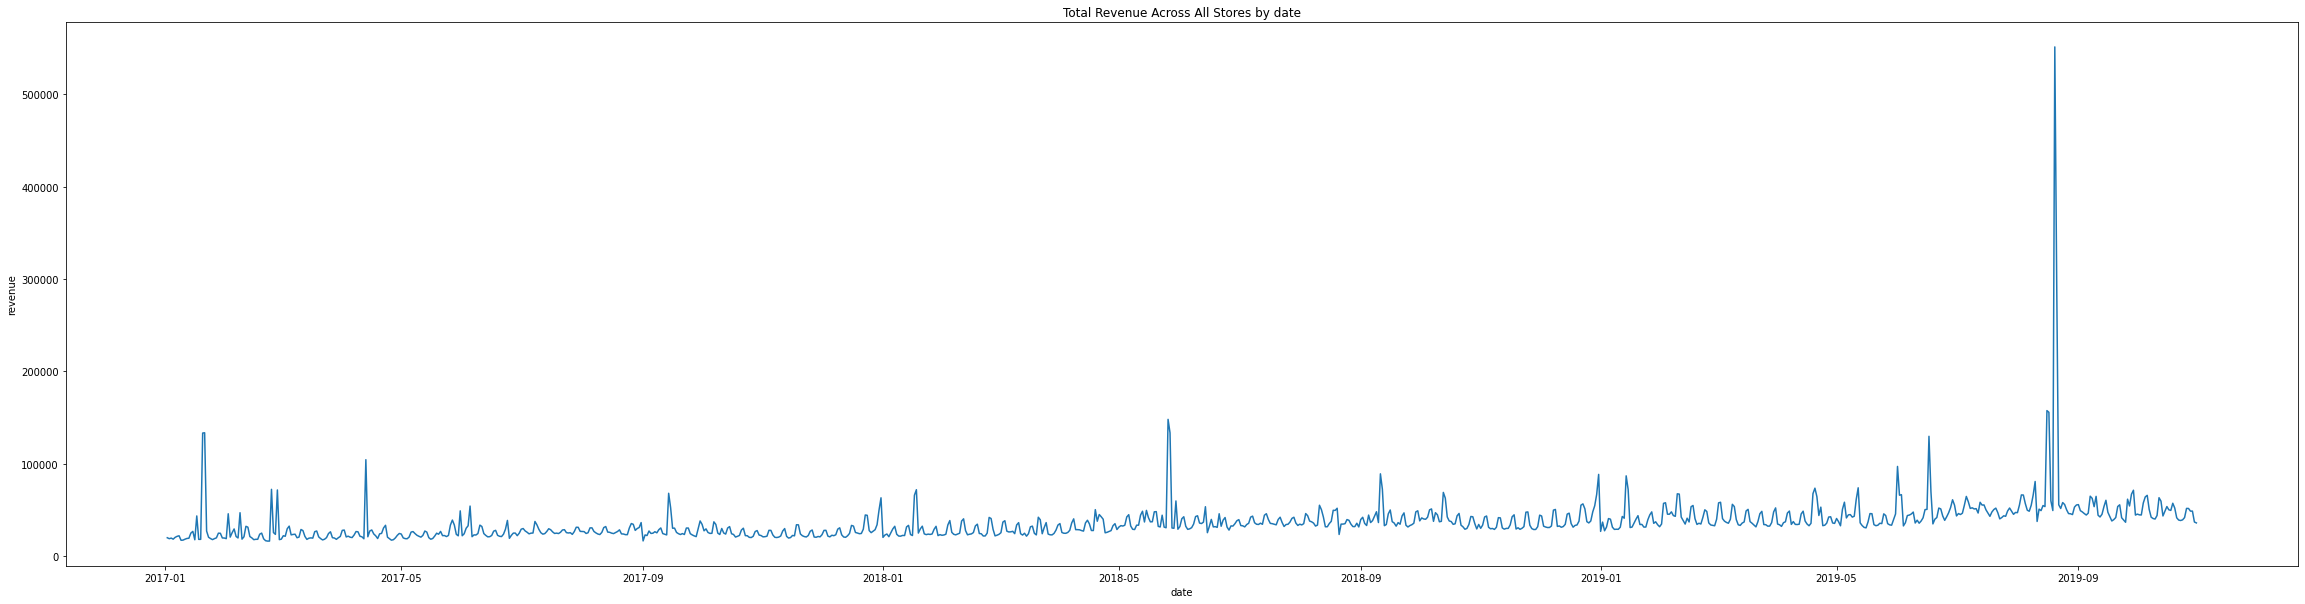

In [ ]:
fig, ax = plt.subplots(figsize=(40, 10))
ax.set(title="Total Revenue Across All Stores by date")
sns.lineplot(x='date',y='revenue',data=daily)

#### Using boxplot to indentify outliers in daily revenue

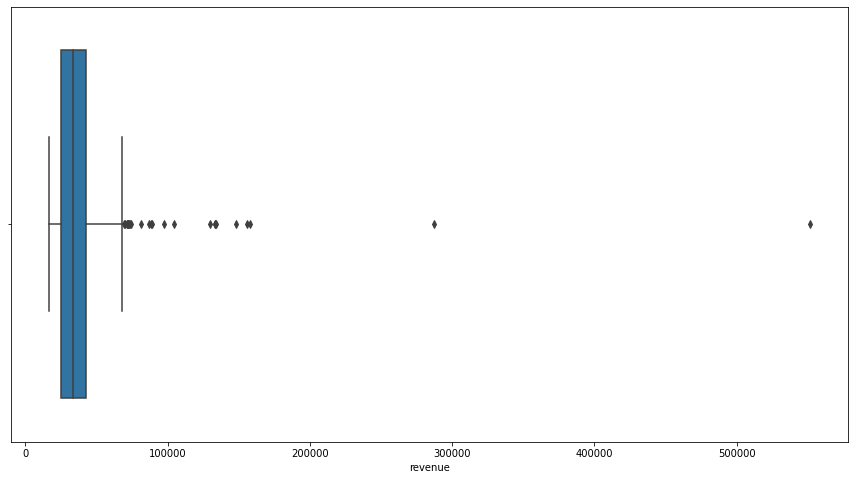

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='revenue',data=daily)

Observation: From the above graph, there are two values of revenue above 280000 on 2019-08-20 and 2019-08-21

From my research, there is a special event on 2019-08-20 and 2019-08-21 that could have an impact on the revenue of these day. For the purpose of finding pattern we can delete them.

**August 20 - 21, 2019**: the protest against the Turkey government’s removal of the mayors of Mardin, Diyarbakır, and Van from office. The protest took place in 5 cities Diyarbakir, Mardin, Van, Istanbul, and Ankara

**Hypothesis**: Protests took place in 5 major Turkish cities can cause the company’s revenue and sales quantity to skyrocket during the day because:
* If the company sold necessary items such as water, food, and medicine. customers still have high demand
* Protests could affect consumer sentiment. The retail company dealt with a surge of frenzied shoppers






##### Deleting 2 Outliers I had indentified 

In [ ]:
daily.sort_values(by='revenue', ascending=False)[:2]

date     revenue   stock  sales
960 2019-08-20  551262.189  296572  24074
961 2019-08-21  287288.060  289653  15206

In [ ]:
daily_new = daily.drop(daily.index[[960,961]])
daily_new

date   revenue   stock  sales
0    2017-01-02  20054.35  210277   6795
1    2017-01-03  19030.64  208991   6558
2    2017-01-04  19660.48  207727   6594
3    2017-01-05  18506.37  208901   6418
4    2017-01-06  20461.74  208792   7160
...         ...       ...     ...    ...
1028 2019-10-27  51751.19  272923   8206
1029 2019-10-28  48833.57  270211   7197
1030 2019-10-29  48874.57  276714   7116
1031 2019-10-30  37095.38  274087   5929
1032 2019-10-31  36089.71  273422   5783

[1031 rows x 4 columns]

### Hypothesis testing (GRUBBS TEST)
Extract the value of outliers using grubbs test

In [ ]:
# install outlier_utils package
! pip install outlier_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from outliers import smirnov_grubbs as grubbs

In [ ]:
data = daily_new.revenue
data = np.array(data)


In [ ]:
# perform grubbs' test
grubbs.max_test_outliers(data, alpha=.05)

[157633.65,
 155793.78,
 148160.95,
 133657.84,
 133545.13,
 133342.71,
 129826.14,
 104515.12099999998,
 97211.14,
 89227.02,
 88605.05,
 87030.26,
 80927.64]

In [ ]:
high_revenue = daily_new.revenue.sort_values(ascending=False)
high_revenue.head(13)

956    157633.650
957    155793.780
509    148160.950
19     133657.840
510    133545.130
18     133342.710
896    129826.140
101    104515.121
880     97211.140
617     89227.020
728     88605.050
742     87030.260
950     80927.640
Name: revenue, dtype: float64

From the Grubbs test, we observe that there are 13 outliers left after removing 2 outliers before

### Z-score method
we can find out how many standard deviations values away from the mean

In [ ]:
import scipy.stats as stats

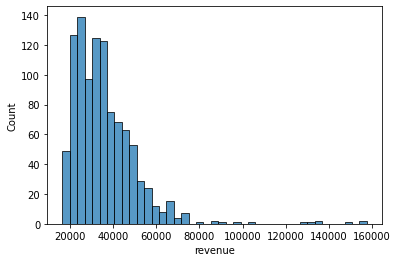

In [ ]:
sns.histplot(data=daily_new,x='revenue')

In [ ]:
z=np.abs(stats.zscore(daily_new.revenue))
z

0       1.029283
1       1.096402
2       1.055107
3       1.130775
4       1.002573
          ...   
1028    1.048879
1029    0.857589
1030    0.860277
1031    0.087990
1032    0.022054
Name: revenue, Length: 1031, dtype: float64

We find the z-score for each of the data point in the dataset and if the z-score is greater than 3 than we can classify that point as an outlier. Any point outside of 3 standard deviations would be an outlier.
 

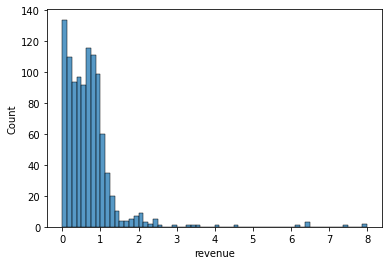

In [ ]:
sns.histplot(z)

In [ ]:
threshold = 3
print(np.where(z>3))

(array([ 18,  19, 101, 509, 510, 617, 728, 742, 880, 896, 956, 957]),)


There are 12 outliers based on Z-score method.  

Although we have not found  the cause of outliers yet, we will need more time to fig deeper into them. However, before we can find common revenue patterns or build revenue pridiction models, we need to remove them.

### Remove 12 outliers based on z-score method

In [ ]:
daily_new_1 = daily_new[(z < 3)]
daily_new_1

date   revenue   stock  sales
0    2017-01-02  20054.35  210277   6795
1    2017-01-03  19030.64  208991   6558
2    2017-01-04  19660.48  207727   6594
3    2017-01-05  18506.37  208901   6418
4    2017-01-06  20461.74  208792   7160
...         ...       ...     ...    ...
1028 2019-10-27  51751.19  272923   8206
1029 2019-10-28  48833.57  270211   7197
1030 2019-10-29  48874.57  276714   7116
1031 2019-10-30  37095.38  274087   5929
1032 2019-10-31  36089.71  273422   5783

[1019 rows x 4 columns]

## Simplify Time Series Data

In [ ]:
daily_new_1['date'] = pd.to_datetime(daily_new_1['date'])

<ipython-input-44-4d899cd565e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_new_1['date'] = pd.to_datetime(daily_new_1['date'])


In [ ]:
daily_new_1.set_index('date', inplace=True)

In [ ]:
daily_new_1

revenue   stock  sales
date                               
2017-01-02  20054.35  210277   6795
2017-01-03  19030.64  208991   6558
2017-01-04  19660.48  207727   6594
2017-01-05  18506.37  208901   6418
2017-01-06  20461.74  208792   7160
...              ...     ...    ...
2019-10-27  51751.19  272923   8206
2019-10-28  48833.57  270211   7197
2019-10-29  48874.57  276714   7116
2019-10-30  37095.38  274087   5929
2019-10-31  36089.71  273422   5783

[1019 rows x 3 columns]

In [ ]:
daily_new.describe()

revenue          stock         sales
count    1031.000000    1031.000000   1031.000000
mean    35753.332989  280751.036857   7676.225024
std     15259.745527   34036.393876   2499.571507
min     16419.630000  203855.000000   4741.000000
25%     24971.830000  265492.500000   6374.500000
50%     33089.800000  288006.000000   7158.000000
75%     42518.600000  303486.000000   8350.000000
max    157633.650000  370611.000000  49934.000000

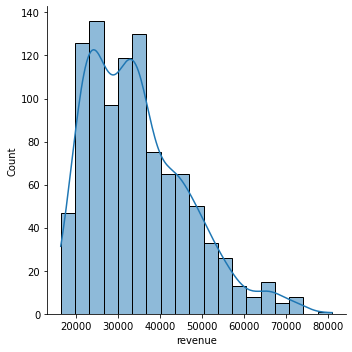

In [ ]:
sns.displot(data=daily_new_1, x='revenue',kde=True)

### Seting Frequency
Since we are using daily data, we would like to set a daily frequency. We see our data has a length of 1033 days

Just to make clear that we are actually missing 2 days because we have removed them, we can take the length of our actual index.

In [ ]:
print('\nUnique dates in our data: ', len(daily_new_1.index.unique()), 'Days')
our_date_range = daily_new_1.index.max() - daily_new_1.index.min()

# Calculate number of days in date range
print('Total days in our date range:', our_date_range.days, 'Days')


Unique dates in our data:  1019 Days
Total days in our date range: 1032 Days


In [ ]:
new_index_1 = pd.date_range(daily_new_1.index.min(),daily_new_1.index.max())
print(new_index_1)

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09',
               '2017-01-10', '2017-01-11',
               ...
               '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-26', '2019-10-27', '2019-10-28', '2019-10-29',
               '2019-10-30', '2019-10-31'],
              dtype='datetime64[ns]', length=1033, freq='D')


We can replace the 2 missing values by the mean value 

In [ ]:
mean= daily_new_1[['revenue','sales','stock']].mean()
mean

revenue     34743.020138
sales        7584.632974
stock      280625.005888
dtype: float64

In [ ]:
daily = daily_new_1.reindex(new_index_1).fillna(mean)

In [ ]:
daily

revenue     stock   sales
2017-01-02  20054.35  210277.0  6795.0
2017-01-03  19030.64  208991.0  6558.0
2017-01-04  19660.48  207727.0  6594.0
2017-01-05  18506.37  208901.0  6418.0
2017-01-06  20461.74  208792.0  7160.0
...              ...       ...     ...
2019-10-27  51751.19  272923.0  8206.0
2019-10-28  48833.57  270211.0  7197.0
2019-10-29  48874.57  276714.0  7116.0
2019-10-30  37095.38  274087.0  5929.0
2019-10-31  36089.71  273422.0  5783.0

[1033 rows x 3 columns]

In [ ]:
daily.describe()

revenue          stock         sales
count   1033.000000    1033.000000   1033.000000
mean   34743.020138  280625.005888   7584.632974
std    11754.773650   33685.776519   2056.088175
min    16419.630000  203855.000000   4741.000000
25%    24978.020000  265852.000000   6375.000000
50%    33117.200000  286794.000000   7159.000000
75%    42213.010000  303126.000000   8300.000000
max    80927.640000  370611.000000  34738.000000

In [ ]:
daily.reset_index()

index   revenue     stock   sales
0    2017-01-02  20054.35  210277.0  6795.0
1    2017-01-03  19030.64  208991.0  6558.0
2    2017-01-04  19660.48  207727.0  6594.0
3    2017-01-05  18506.37  208901.0  6418.0
4    2017-01-06  20461.74  208792.0  7160.0
...         ...       ...       ...     ...
1028 2019-10-27  51751.19  272923.0  8206.0
1029 2019-10-28  48833.57  270211.0  7197.0
1030 2019-10-29  48874.57  276714.0  7116.0
1031 2019-10-30  37095.38  274087.0  5929.0
1032 2019-10-31  36089.71  273422.0  5783.0

[1033 rows x 4 columns]

In [ ]:
daily_revenue = daily['revenue']
daily_revenue = pd.DataFrame(daily_revenue)
daily_revenue

revenue
2017-01-02  20054.35
2017-01-03  19030.64
2017-01-04  19660.48
2017-01-05  18506.37
2017-01-06  20461.74
...              ...
2019-10-27  51751.19
2019-10-28  48833.57
2019-10-29  48874.57
2019-10-30  37095.38
2019-10-31  36089.71

[1033 rows x 1 columns]

## High turnover days

In [ ]:
random_day = sales_df[sales_df.date.isin(['2017-01-20','2017-01-21','2017-04-13','2018-05-26','2018-05-27','2018-09-11','2018-12-31','2019-01-14','2019-06-01','2019-06-17','2019-08-16','2019-08-17','2019-08-20','2019-08-21'])]
random_day['date'] = pd.to_datetime(random_day['date']).dt.date

<ipython-input-57-9d137f97b275>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_day['date'] = pd.to_datetime(random_day['date']).dt.date


In [ ]:
random_day

product_id store_id        date  sales  revenue  stock  price
236878        P0001    S0002  2017-01-20      0      0.0      2    6.5
236879        P0001    S0023  2017-01-20      0      0.0      6    6.5
236880        P0001    S0027  2017-01-20      0      0.0      4    6.5
236881        P0001    S0040  2017-01-20      0      0.0     18    6.5
236882        P0001    S0049  2017-01-20      0      0.0      6    6.5
...             ...      ...         ...    ...      ...    ...    ...
16828650      P0748    S0125  2019-08-21      0      0.0     12   18.9
16828651      P0748    S0126  2019-08-21      0      0.0      6   18.9
16828652      P0748    S0131  2019-08-21      0      0.0      8   18.9
16828653      P0748    S0132  2019-08-21      0      0.0     10   18.9
16828654      P0748    S0142  2019-08-21      0      0.0     22   18.9

[261532 rows x 7 columns]


# Exploratory Time-Series Data Analysis 

* What is the Revenue Pattern on Daily, Weekly, Monthly and Yearly Basis?

* Whether or not the revenue is influenced by seasonality and number of stores?
  * Number of Stores Distribition across each month
  * Two-Way ANOVA testing: Whether or not the revenue is influenced by seasonality and number of stores?
* Whether or not the revenue is influenced by the Sales Quantity and Seasonality
  * Sales quantity distribution 
  * Two-Way ANOVA testing: Whether or not the revenue is influenced by seasonality and sales quantity?
* Whether or not The Number of Product_id and seasonality effect on revenue?
  * Number of products distribition
  * Two-Way ANOVA testing: Whether or not the revenue is influenced by seasonality and number of product_id?
*  Price of products effect on revenue


In [ ]:
from statsmodels.tsa.tsatools import detrend
import statsmodels.api as sm
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

In [ ]:
!pip install -U scipy
import scipy.stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind, ttest_rel

#ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 274 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


## What is the Revenue Pattern on Annual, Quanterly, Monthly, Daily Dataset?


### Resampling - Change the frequency from days to weeks, months, quarters, years

In [ ]:
daily

revenue     stock   sales
2017-01-02  20054.35  210277.0  6795.0
2017-01-03  19030.64  208991.0  6558.0
2017-01-04  19660.48  207727.0  6594.0
2017-01-05  18506.37  208901.0  6418.0
2017-01-06  20461.74  208792.0  7160.0
...              ...       ...     ...
2019-10-27  51751.19  272923.0  8206.0
2019-10-28  48833.57  270211.0  7197.0
2019-10-29  48874.57  276714.0  7116.0
2019-10-30  37095.38  274087.0  5929.0
2019-10-31  36089.71  273422.0  5783.0

[1033 rows x 3 columns]

In [ ]:
weekly = daily.resample('W').sum()
weekly

revenue         stock         sales
2017-01-08  141444.800000  1.458470e+06  48405.000000
2017-01-15  144054.020000  1.471274e+06  51438.000000
2017-01-22  194875.140277  1.679541e+06  51852.265947
2017-01-29  146590.660000  1.529557e+06  51350.000000
2017-02-05  180482.330000  1.520059e+06  66666.000000
...                   ...           ...           ...
2019-10-06  367517.490000  1.988941e+06  64416.000000
2019-10-13  341305.120000  1.956842e+06  52842.000000
2019-10-20  355714.700000  1.944585e+06  49684.000000
2019-10-27  304376.400000  1.929893e+06  47360.000000
2019-11-03  170893.230000  1.094434e+06  26025.000000

[148 rows x 3 columns]

In [ ]:
weekly_revenue = weekly['revenue']
weekly_revenue = pd.DataFrame(weekly_revenue)

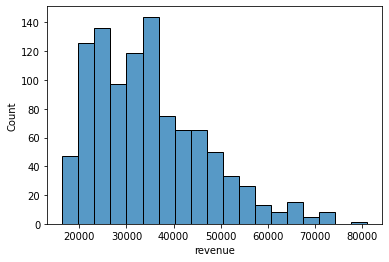

In [ ]:
sns.histplot(data=daily,x=daily.revenue)

In [ ]:
monthly = daily.resample('M').sum()
monthly

revenue         stock          sales
2017-01-31  6.665374e+05  6.575314e+06  217050.265947
2017-02-28  7.577656e+05  6.095630e+06  290631.000000
2017-03-31  6.928658e+05  6.808995e+06  231893.000000
2017-04-30  7.103701e+05  6.678491e+06  218898.632974
2017-05-31  7.668637e+05  7.039953e+06  213707.000000
2017-06-30  7.861011e+05  7.132475e+06  207657.000000
2017-07-31  8.473743e+05  7.326458e+06  226851.000000
2017-08-31  8.577317e+05  8.170412e+06  238864.000000
2017-09-30  8.451559e+05  8.008008e+06  224254.000000
2017-10-31  8.076239e+05  8.350495e+06  214561.000000
2017-11-30  7.083040e+05  8.041616e+06  190321.000000
2017-12-31  9.031138e+05  9.266496e+06  257159.000000
2018-01-31  8.743290e+05  8.544201e+06  212644.000000
2018-02-28  7.868963e+05  7.761031e+06  200808.000000
2018-03-31  8.880012e+05  8.614861e+06  226845.000000
2018-04-30  9.678679e+05  8.801687e+06  233821.000000
2018-05-31  1.160005e+06  1.002888e+07  260826.265947
2018-06-30  1.072786e+06  9.878310e+06  243256.000000
2018-07-31  1.148305e+06  1.007470e+07  275813.000000
2018-08-31  1.181855e+06  9.784888e+06  278559.000000
2018-09-30  1.202330e+06  9.228237e+06  257096.632974
2018-10-31  1.263368e+06  9.244794e+06  248545.000000
2018-11-30  1.027967e+06  8.881412e+06  199602.000000
2018-12-31  1.255046e+06  9.665415e+06  234704.632974
2019-01-31  1.131814e+06  9.416441e+06  209469.632974
2019-02-28  1.237115e+06  8.423878e+06  218723.000000
2019-03-31  1.278992e+06  9.109997e+06  221216.000000
2019-04-30  1.245068e+06  8.834656e+06  208391.000000
2019-05-31  1.284677e+06  9.286249e+06  203075.000000
2019-06-30  1.377222e+06  9.001330e+06  220566.265947
2019-07-31  1.533953e+06  9.103860e+06  239270.000000
2019-08-31  1.606127e+06  9.436889e+06  250251.531894
2019-09-30  1.520783e+06  8.637056e+06  226361.000000
2019-10-31  1.495227e+06  8.632519e+06  233235.000000

In [ ]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2017-01-31 to 2019-10-31
Freq: M
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  34 non-null     float64
 1   stock    34 non-null     float64
 2   sales    34 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB


In [ ]:
monthly_revenue_1 = monthly['revenue']
monthly_revenue_1 = pd.DataFrame(monthly_revenue_1)

In [ ]:
quarterly = daily.resample('Q').sum()
quarterly

revenue         stock          sales
2017-03-31  2.117169e+06  1.947994e+07  739574.265947
2017-06-30  2.263335e+06  2.085092e+07  640262.632974
2017-09-30  2.550262e+06  2.350488e+07  689969.000000
2017-12-31  2.419042e+06  2.565861e+07  662041.000000
2018-03-31  2.549226e+06  2.492009e+07  640297.000000
2018-06-30  3.200659e+06  2.870888e+07  737903.265947
2018-09-30  3.532489e+06  2.908782e+07  811468.632974
2018-12-31  3.546381e+06  2.779162e+07  682851.632974
2019-03-31  3.647921e+06  2.695032e+07  649408.632974
2019-06-30  3.906967e+06  2.712224e+07  632032.265947
2019-09-30  4.660863e+06  2.717781e+07  715882.531894
2019-12-31  1.495227e+06  8.632519e+06  233235.000000

In [ ]:
quarterly_revenue = quarterly['revenue']
quarterly_revenue = pd.DataFrame(quarterly_revenue)

In [ ]:
annual = daily.resample('Y').sum()
annual

revenue         stock         sales
2017-12-31  9.349807e+06  8.949434e+07  2.731847e+06
2018-12-31  1.282875e+07  1.105084e+08  2.872521e+06
2019-12-31  1.371098e+07  8.988288e+07  2.230558e+06

In [ ]:
annual_revenue = annual['revenue']
annual_revenue = pd.DataFrame(annual_revenue)

### Visualization - Annual Revenue, Quarterly Revenue, Monthly Revenue, Daily Revenue





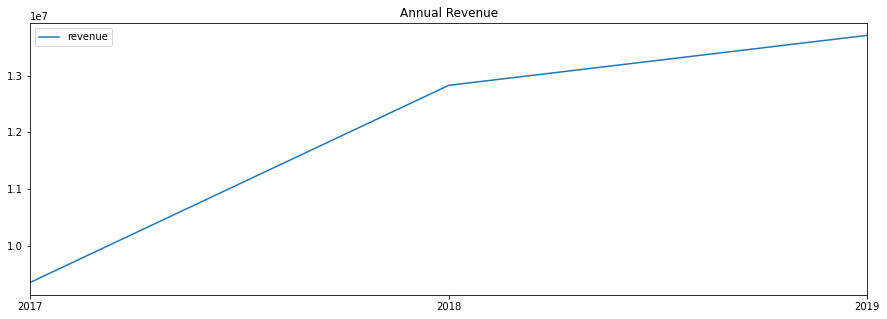

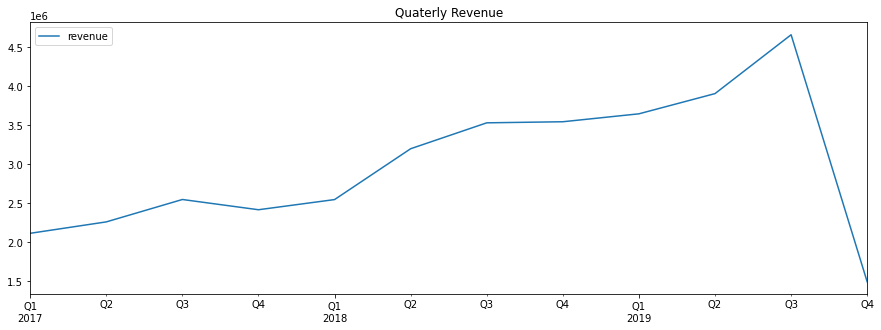

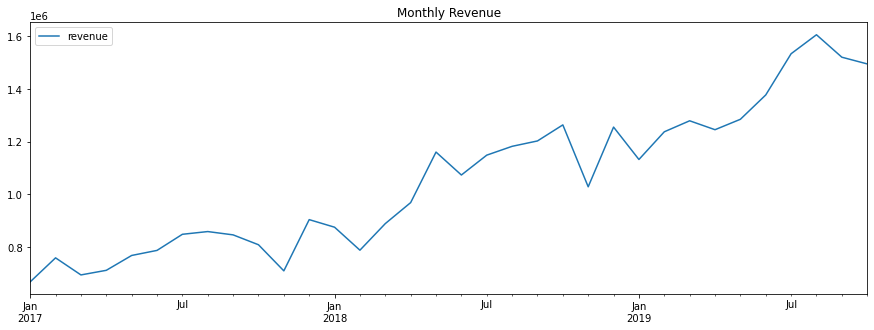

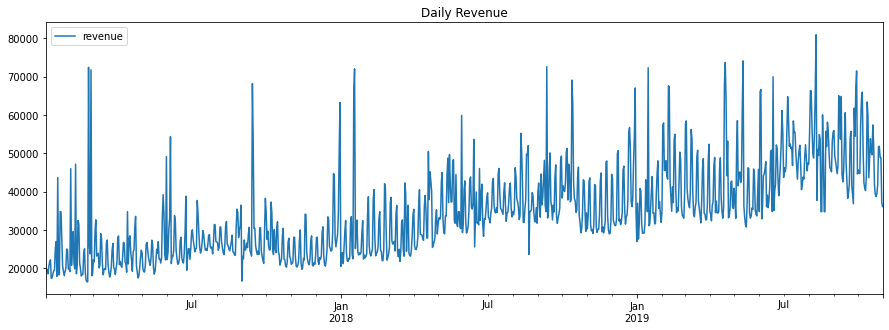

In [ ]:
# plot annually
annual_revenue.plot(figsize=(15,5), title='Annual Revenue')

# plot quarterly
quarterly_revenue.plot(figsize=(15,5), title='Quaterly Revenue')

# plot monthly 
monthly_revenue_1.plot(figsize=(15,5), title='Monthly Revenue')

# plot daily
daily_revenue.plot(figsize=(15,5), title='Daily Revenue')

### Visualization - Plotting Annual, Monthly Growth

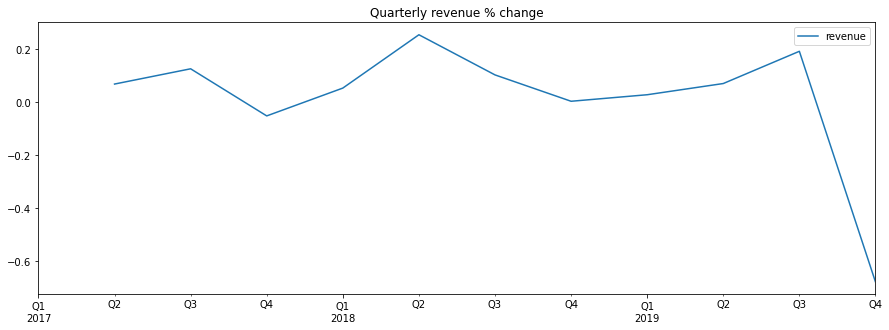

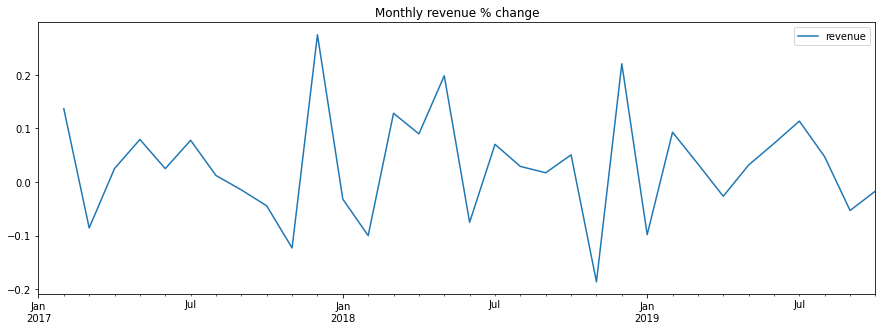

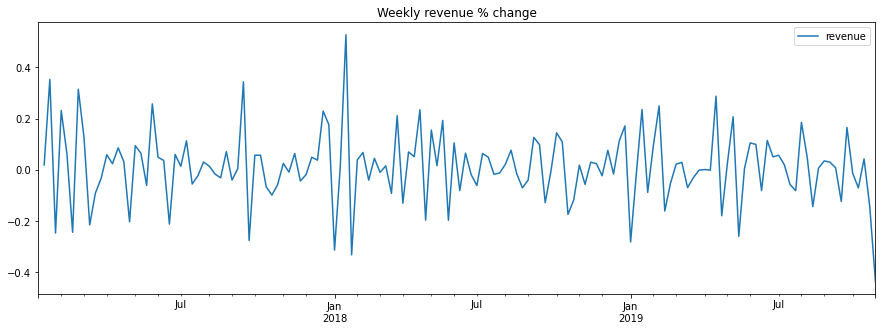

In [ ]:

# Quaterly Revenue
quarterly_revenue.pct_change().plot(figsize=(15,5), title= 'Quarterly revenue % change')

# Monthly Revenue Percent Change
monthly_revenue_1.pct_change().plot(figsize=(15,5), title= 'Monthly revenue % change')

# Weekly Revenue percent change
weekly_revenue.pct_change().plot(figsize=(15,5), title='Weekly revenue % change')

## How revenue change in a week?

In [ ]:
daily.head()

revenue     stock   sales
2017-01-02  20054.35  210277.0  6795.0
2017-01-03  19030.64  208991.0  6558.0
2017-01-04  19660.48  207727.0  6594.0
2017-01-05  18506.37  208901.0  6418.0
2017-01-06  20461.74  208792.0  7160.0

In [ ]:
daily['day_of_week'] = daily.index.day_name()
daily['dayofweek'] = daily.index.dayofweek
daily

revenue     stock   sales day_of_week  dayofweek
2017-01-02  20054.35  210277.0  6795.0      Monday          0
2017-01-03  19030.64  208991.0  6558.0     Tuesday          1
2017-01-04  19660.48  207727.0  6594.0   Wednesday          2
2017-01-05  18506.37  208901.0  6418.0    Thursday          3
2017-01-06  20461.74  208792.0  7160.0      Friday          4
...              ...       ...     ...         ...        ...
2019-10-27  51751.19  272923.0  8206.0      Sunday          6
2019-10-28  48833.57  270211.0  7197.0      Monday          0
2019-10-29  48874.57  276714.0  7116.0     Tuesday          1
2019-10-30  37095.38  274087.0  5929.0   Wednesday          2
2019-10-31  36089.71  273422.0  5783.0    Thursday          3

[1033 rows x 5 columns]

Text(0.5, 1.0, 'Revenue changes across all week')

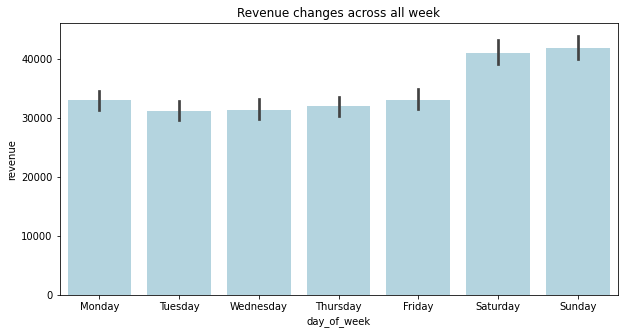

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='day_of_week', y='revenue', data=daily, estimator=np.mean, color='lightblue',
            order=('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.title('Revenue changes across all week')

#### Is it day of week affect on revenue?
* H_0 = µ_Mon = µ_Tue = µ_Wed = µ_Thurs = µ_Fri = µ_Sat
* H_1 : At least one of the means differ


In [ ]:
monday = daily[daily['day_of_week'] == 'Monday']['revenue'] #Monday
tue = daily[daily['day_of_week'] == 'Tuesday']['revenue'] #Tue
wed = daily[daily['day_of_week'] == 'Wednesday']['revenue'] #Wed
thurs = daily[daily['day_of_week'] == 'Thursday']['revenue'] #Thurs
fri = daily[daily['day_of_week'] == 'Friday']['revenue'] #Fri
sat = daily[daily['day_of_week'] == 'Saturday']['revenue'] #Sat
sun = daily[daily['day_of_week'] == 'Sunday']['revenue'] #Sun

In [ ]:
anova_result = f_oneway(monday,tue,wed,thurs,fri,sat,sun)
anova_result

F_onewayResult(statistic=26.0256913605002, pvalue=6.477064766343072e-29)

-> Since the p-value is less than .05, we fail to reject the null hypothesis.

-> This means we do have sufficient evidence to say that there is a difference in revenue during the day of the week.

### which days of the week are different from each other? 
One of the most commonly used post hoc tests is Tukey’s Test, which allows us to make pairwise comparisons between the means of each group while controlling for the family-wise error rate.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(endog=daily['revenue'],
                          groups=daily['day_of_week'],
                          alpha=0.05)

In [ ]:
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1    group2    meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------
  Friday    Monday   -126.0232    1.0  -3904.1612  3652.1149  False
  Friday  Saturday   7926.1751    0.0   4141.6388 11710.7113   True
  Friday    Sunday    8762.623    0.0   4978.0868 12547.1593   True
  Friday  Thursday  -1182.0645 0.9687  -4960.2025  2596.0736  False
  Friday   Tuesday  -1927.6303 0.7406  -5705.7684  1850.5077  False
  Friday Wednesday  -1699.9204 0.8382  -5478.0584  2078.2176  False
  Monday  Saturday   8052.1983    0.0   4274.0602 11830.3363   True
  Monday    Sunday   8888.6462    0.0   5110.5082 12666.7843   True
  Monday  Thursday  -1056.0413 0.9822  -4827.7703  2715.6877  False
  Monday   Tuesday  -1801.6072  0.796  -5573.3361  1970.1218  False
  Monday Wednesday  -1573.8972 0.8813  -5345.6262  2197.8318  False
Saturday    Sunday     836.448 0.9949  -2948.088

P value for the different in means between  Monday and Saturday: 0.0

-> there are the differences in means between Saturday and other days
-> there are the differences in means between Sunday and other days

## Do Holiday and Events have an impact on daily sales? 

**Holiday in Turkey:**
1. New year's day : Jan 1
2. labour day: May 1
3. Ramadan
 * 2017: May 27 - June 24
 * 2018: May 16 -June 14
 * 2019: May 6 - June 3
4. National unity day: Jul 15
5. Sacrifice feast 
 * 2017: from August 31 to September 4
 * 2018: from to August 21 to August 24
 * 2019: from August 11 to August 
6. Christmas: December 24

### National and Regional Holiday in Turkey

If the day is the holiday, it equals one, if not, it equals zero

In [ ]:
# labour day
daily.loc[(daily.index == '2017-05-01') | (daily.index == '2018-05-01') | (daily.index == '2019-05-01'), 'Holiday'] = 1

# new year holiday
daily.loc[(daily.index == '2017-01-01') | (daily.index == '2018-01-01') | (daily.index == '2019-01-01'), 'Holiday'] = 1

# National unity day
daily.loc[(daily.index == '2017-07-15') | (daily.index == '2018-07-15') | (daily.index == '2019-07-15'), 'Holiday'] = 1

# Victory day August 30, 2017
daily.loc[(daily.index == '2017-08-30') | (daily.index == '2018-08-30') | (daily.index == '2019-08-30'), 'Holiday'] = 1

# black friday
daily.loc[(daily.index == '2017-11-24') | (daily.index == '2018-11-23') | (daily.index == '2019-11-29'), 'Holiday'] = 1

# Christmas
daily.loc[(pd.date_range('2017-12-24','2017-12-25')),'Holiday'] = 1
daily.loc[(pd.date_range('2018-12-24','2018-12-25')),'Holiday'] = 1

# Sacrifice feast
daily.loc[(pd.date_range('2017-08-31','2017-09-04')),'Holiday'] = 1
daily.loc[(pd.date_range('2018-08-21','2018-08-24')),'Holiday'] = 1
daily.loc[(pd.date_range('2019-08-11','2019-08-14')),'Holiday'] = 1

# Ramadan
daily.loc[(pd.date_range('2017-05-27','2017-06-24')),'Holiday'] = 1
daily.loc[(pd.date_range('2018-05-16','2018-06-14')),'Holiday'] = 1
daily.loc[(pd.date_range('2019-05-06','2019-06-03')),'Holiday'] = 1

daily['Holiday'] = daily['Holiday'].fillna(0)
daily

revenue     stock   sales  Holiday
2017-01-02  20054.35  210277.0  6795.0      0.0
2017-01-03  19030.64  208991.0  6558.0      0.0
2017-01-04  19660.48  207727.0  6594.0      0.0
2017-01-05  18506.37  208901.0  6418.0      0.0
2017-01-06  20461.74  208792.0  7160.0      0.0
...              ...       ...     ...      ...
2019-10-27  51751.19  272923.0  8206.0      0.0
2019-10-28  48833.57  270211.0  7197.0      0.0
2019-10-29  48874.57  276714.0  7116.0      0.0
2019-10-30  37095.38  274087.0  5929.0      0.0
2019-10-31  36089.71  273422.0  5783.0      0.0

[1033 rows x 4 columns]

In [ ]:
daily.loc[daily['Holiday'] == 1]

revenue     stock   sales  Holiday
2017-05-01  24043.73  217882.0  7295.0      1.0
2017-05-27  39170.41  242952.0  8276.0      1.0
2017-05-28  33826.03  238368.0  8069.0      1.0
2017-05-29  23708.80  237508.0  5976.0      1.0
2017-05-30  22115.31  241832.0  5854.0      1.0
...              ...       ...     ...      ...
2019-08-11  37675.96  332755.0  6677.0      1.0
2019-08-12  51001.63  328161.0  7878.0      1.0
2019-08-13  49403.21  324861.0  7873.0      1.0
2019-08-14  54860.73  321645.0  8033.0      1.0
2019-08-30  53183.13  292791.0  7889.0      1.0

[118 rows x 4 columns]

#### Using T-Test to compare the daily revenue between holiday and non-holiday days

* H0 = µ_holiday = µ_non-holiday
* H1 =  µ_holiday # µ_non-holiday

In [ ]:
# Extract revenue and group by holiday and non-holiday
revenue_holiday = daily[daily['Holiday'] == 1]['revenue']
revenue_non_holiday = daily[daily['Holiday'] == 0]['revenue']

In [ ]:
ttest_ind?

In [ ]:
ttest_holiday_result = ttest_ind(a=revenue_holiday, b=revenue_non_holiday, equal_var=False, alternative='two-sided')
ttest_holiday_result

Ttest_indResult(statistic=1.1404250287690088, pvalue=0.255873992242178)

In [ ]:
ttest_holiday_result.pvalue 

if ttest_holiday_result.pvalue < 0.05: 
     print('Reject H0 - µ_holiday # µ_non-holiday') 
else:
      print('Fail to reject H0 - µ_holiday = µ_non-holiday')   

Fail to reject H0 - µ_holiday = µ_non-holiday


Since the p-value is not less than .05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that there is a difference in revenue between the holiday days and non-holiday days

<BarContainer object of 2 artists>

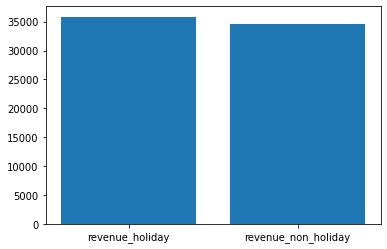

In [ ]:
x_label = ['revenue_holiday','revenue_non_holiday']
y_label = [revenue_holiday.mean(),
           revenue_non_holiday.mean()          
           ]
plt.bar(x_label, y_label)


### Which Holidays have impact on daily revenue?

In [ ]:
daily

revenue     stock   sales  Holiday  national_unity_day
2017-01-02  20054.35  210277.0  6795.0      0.0                 NaN
2017-01-03  19030.64  208991.0  6558.0      0.0                 NaN
2017-01-04  19660.48  207727.0  6594.0      0.0                 NaN
2017-01-05  18506.37  208901.0  6418.0      0.0                 NaN
2017-01-06  20461.74  208792.0  7160.0      0.0                 NaN
...              ...       ...     ...      ...                 ...
2019-10-27  51751.19  272923.0  8206.0      0.0                 NaN
2019-10-28  48833.57  270211.0  7197.0      0.0                 NaN
2019-10-29  48874.57  276714.0  7116.0      0.0                 NaN
2019-10-30  37095.38  274087.0  5929.0      0.0                 NaN
2019-10-31  36089.71  273422.0  5783.0      0.0                 NaN

[1033 rows x 5 columns]

#### labour day

In [ ]:
# Labour day
daily.loc[(daily.index == '2017-05-01') | (daily.index == '2018-05-01') | (daily.index == '2019-05-01'), 'labour_holiday'] = 1
daily.loc[(daily.index != '2017-05-01') & (daily.index != '2018-05-01') & (daily.index != '2019-05-01'), 'labour_holiday'] = 0
daily

revenue     stock   sales  Holiday  national_unity_day  \
2017-01-02  20054.35  210277.0  6795.0      0.0                 NaN   
2017-01-03  19030.64  208991.0  6558.0      0.0                 NaN   
2017-01-04  19660.48  207727.0  6594.0      0.0                 NaN   
2017-01-05  18506.37  208901.0  6418.0      0.0                 NaN   
2017-01-06  20461.74  208792.0  7160.0      0.0                 NaN   
...              ...       ...     ...      ...                 ...   
2019-10-27  51751.19  272923.0  8206.0      0.0                 NaN   
2019-10-28  48833.57  270211.0  7197.0      0.0                 NaN   
2019-10-29  48874.57  276714.0  7116.0      0.0                 NaN   
2019-10-30  37095.38  274087.0  5929.0      0.0                 NaN   
2019-10-31  36089.71  273422.0  5783.0      0.0                 NaN   

            labour_holiday  
2017-01-02             0.0  
2017-01-03             0.0  
2017-01-04             0.0  
2017-01-05             0.0  
2017-01-06             0.0  
...                    ...  
2019-10-27             0.0  
2019-10-28             0.0  
2019-10-29             0.0  
2019-10-30             0.0  
2019-10-31             0.0  

[1033 rows x 6 columns]

In [ ]:
revenue_labour_day = daily[daily['labour_holiday'] == 1]['revenue']
revenue_non_labour_day =  daily[daily['labour_holiday'] == 0]['revenue']

# tttest
ttest_labour_result = ttest_ind(a=revenue_labour_day, b=revenue_non_labour_day, equal_var=False, alternative='two-sided')
ttest_labour_result

Ttest_indResult(statistic=-0.527346630239763, pvalue=0.650088235331389)

#### New year Holiday

In [ ]:
# new year holiday
daily.loc[(daily.index == '2017-01-01') | (daily.index == '2018-01-01') | (daily.index == '2019-01-01'), 'new_year_holiday'] = 1
daily.loc[(daily.index != '2017-01-01') & (daily.index != '2018-01-01') & (daily.index != '2019-01-01'), 'new_year_holiday'] = 0
daily

revenue     stock   sales  Holiday  national_unity_day  \
2017-01-02  20054.35  210277.0  6795.0      0.0                 NaN   
2017-01-03  19030.64  208991.0  6558.0      0.0                 NaN   
2017-01-04  19660.48  207727.0  6594.0      0.0                 NaN   
2017-01-05  18506.37  208901.0  6418.0      0.0                 NaN   
2017-01-06  20461.74  208792.0  7160.0      0.0                 NaN   
...              ...       ...     ...      ...                 ...   
2019-10-27  51751.19  272923.0  8206.0      0.0                 NaN   
2019-10-28  48833.57  270211.0  7197.0      0.0                 NaN   
2019-10-29  48874.57  276714.0  7116.0      0.0                 NaN   
2019-10-30  37095.38  274087.0  5929.0      0.0                 NaN   
2019-10-31  36089.71  273422.0  5783.0      0.0                 NaN   

            labour_holiday  new_year_holiday  
2017-01-02             0.0               0.0  
2017-01-03             0.0               0.0  
2017-01-04             0.0               0.0  
2017-01-05             0.0               0.0  
2017-01-06             0.0               0.0  
...                    ...               ...  
2019-10-27             0.0               0.0  
2019-10-28             0.0               0.0  
2019-10-29             0.0               0.0  
2019-10-30             0.0               0.0  
2019-10-31             0.0               0.0  

[1033 rows x 7 columns]

In [ ]:
revenue_newyear_day = daily[daily['new_year_holiday'] == 1]['revenue']
revenue_nonnewyear_labour_day =  daily[daily['new_year_holiday'] == 0]['revenue']

# tttest
ttest_newyear_result = ttest_ind(a=revenue_newyear_day, b=revenue_nonnewyear_labour_day, equal_var=False, alternative='two-sided')
ttest_newyear_result

Ttest_indResult(statistic=-3.3951356715305483, pvalue=0.17737848512136237)

#### National Unity Day

In [ ]:
# National unity day
daily.loc[(daily.index == '2017-07-15') | (daily.index == '2018-07-15') | (daily.index == '2019-07-15'), 'national_unity_day'] = 1
daily.loc[(daily.index != '2017-07-15') & (daily.index != '2018-07-15') & (daily.index != '2019-07-15'), 'national_unity_day'] = 0
daily

revenue     stock   sales  Holiday  national_unity_day  \
2017-01-02  20054.35  210277.0  6795.0      0.0                 0.0   
2017-01-03  19030.64  208991.0  6558.0      0.0                 0.0   
2017-01-04  19660.48  207727.0  6594.0      0.0                 0.0   
2017-01-05  18506.37  208901.0  6418.0      0.0                 0.0   
2017-01-06  20461.74  208792.0  7160.0      0.0                 0.0   
...              ...       ...     ...      ...                 ...   
2019-10-27  51751.19  272923.0  8206.0      0.0                 0.0   
2019-10-28  48833.57  270211.0  7197.0      0.0                 0.0   
2019-10-29  48874.57  276714.0  7116.0      0.0                 0.0   
2019-10-30  37095.38  274087.0  5929.0      0.0                 0.0   
2019-10-31  36089.71  273422.0  5783.0      0.0                 0.0   

            labour_holiday  new_year_holiday  
2017-01-02             0.0               0.0  
2017-01-03             0.0               0.0  
2017-01-04             0.0               0.0  
2017-01-05             0.0               0.0  
2017-01-06             0.0               0.0  
...                    ...               ...  
2019-10-27             0.0               0.0  
2019-10-28             0.0               0.0  
2019-10-29             0.0               0.0  
2019-10-30             0.0               0.0  
2019-10-31             0.0               0.0  

[1033 rows x 7 columns]

In [ ]:
daily.loc[daily['national_unity_day'] == 1]

revenue     stock    sales  Holiday  national_unity_day  \
2017-07-15  29795.38  239604.0   7735.0      0.0                 1.0   
2018-07-15  46045.85  322854.0  11041.0      0.0                 1.0   
2019-07-15  55529.61  288971.0   7910.0      0.0                 1.0   

            labour_holiday  new_year_holiday  
2017-07-15             0.0               0.0  
2018-07-15             0.0               0.0  
2019-07-15             0.0               0.0

In [ ]:
revenue_unity_result = daily[daily['national_unity_day'] == 1]['revenue']
revenue_non_unity_result = daily[daily['national_unity_day'] == 0]['revenue']

ttest_unity_result = ttest_ind(a=revenue_unity_result, b=revenue_non_unity_result, equal_var=False, alternative='two-sided')
ttest_unity_result

Ttest_indResult(statistic=1.2061383414735103, pvalue=0.3505896876201375)

#### Victory day 

In [ ]:
# Victory day August 30, 2017
daily.loc[(daily.index == '2017-08-30') | (daily.index == '2018-08-30') | (daily.index == '2019-08-30'), 'victory day'] = 1
daily.loc[(daily.index != '2017-08-30') & (daily.index != '2018-08-30') & (daily.index != '2019-08-30'), 'victory day'] = 0
daily

revenue     stock   sales  Holiday  national_unity_day  \
2017-01-02  20054.35  210277.0  6795.0      0.0                 0.0   
2017-01-03  19030.64  208991.0  6558.0      0.0                 0.0   
2017-01-04  19660.48  207727.0  6594.0      0.0                 0.0   
2017-01-05  18506.37  208901.0  6418.0      0.0                 0.0   
2017-01-06  20461.74  208792.0  7160.0      0.0                 0.0   
...              ...       ...     ...      ...                 ...   
2019-10-27  51751.19  272923.0  8206.0      0.0                 0.0   
2019-10-28  48833.57  270211.0  7197.0      0.0                 0.0   
2019-10-29  48874.57  276714.0  7116.0      0.0                 0.0   
2019-10-30  37095.38  274087.0  5929.0      0.0                 0.0   
2019-10-31  36089.71  273422.0  5783.0      0.0                 0.0   

            labour_holiday  new_year_holiday  victory day  
2017-01-02             0.0               0.0          0.0  
2017-01-03             0.0               0.0          0.0  
2017-01-04             0.0               0.0          0.0  
2017-01-05             0.0               0.0          0.0  
2017-01-06             0.0               0.0          0.0  
...                    ...               ...          ...  
2019-10-27             0.0               0.0          0.0  
2019-10-28             0.0               0.0          0.0  
2019-10-29             0.0               0.0          0.0  
2019-10-30             0.0               0.0          0.0  
2019-10-31             0.0               0.0          0.0  

[1033 rows x 8 columns]

In [ ]:
revenue_victory_result = daily[daily['victory day'] == 1]['revenue']
revenue_non_victory_result = daily[daily['victory day'] == 0]['revenue']

ttest_victory_result = ttest_ind(a=revenue_victory_result, b=revenue_non_victory_result, equal_var=False, alternative='two-sided')
ttest_victory_result

Ttest_indResult(statistic=0.7863575076465453, pvalue=0.5136117699739968)

#### Black Friday

In [ ]:
# black friday
daily.loc[(daily.index == '2017-11-24') | (daily.index == '2018-11-23') | (daily.index == '2019-11-29'), 'black friday'] = 1
daily.loc[(daily.index != '2017-11-24') & (daily.index != '2018-11-23') & (daily.index != '2019-11-29'), 'black friday'] = 0
daily

revenue     stock   sales  Holiday  national_unity_day  \
2017-01-02  20054.35  210277.0  6795.0      0.0                 0.0   
2017-01-03  19030.64  208991.0  6558.0      0.0                 0.0   
2017-01-04  19660.48  207727.0  6594.0      0.0                 0.0   
2017-01-05  18506.37  208901.0  6418.0      0.0                 0.0   
2017-01-06  20461.74  208792.0  7160.0      0.0                 0.0   
...              ...       ...     ...      ...                 ...   
2019-10-27  51751.19  272923.0  8206.0      0.0                 0.0   
2019-10-28  48833.57  270211.0  7197.0      0.0                 0.0   
2019-10-29  48874.57  276714.0  7116.0      0.0                 0.0   
2019-10-30  37095.38  274087.0  5929.0      0.0                 0.0   
2019-10-31  36089.71  273422.0  5783.0      0.0                 0.0   

            labour_holiday  new_year_holiday  victory day  black friday  
2017-01-02             0.0               0.0          0.0           0.0  
2017-01-03             0.0               0.0          0.0           0.0  
2017-01-04             0.0               0.0          0.0           0.0  
2017-01-05             0.0               0.0          0.0           0.0  
2017-01-06             0.0               0.0          0.0           0.0  
...                    ...               ...          ...           ...  
2019-10-27             0.0               0.0          0.0           0.0  
2019-10-28             0.0               0.0          0.0           0.0  
2019-10-29             0.0               0.0          0.0           0.0  
2019-10-30             0.0               0.0          0.0           0.0  
2019-10-31             0.0               0.0          0.0           0.0  

[1033 rows x 9 columns]

In [ ]:
revenue_blackfriday_result = daily[daily['black friday'] == 1]['revenue']
revenue_non_blackfriday_result = daily[daily['black friday'] == 0]['revenue']

ttest_blackfriday_result = ttest_ind(a=revenue_blackfriday_result, b=revenue_non_blackfriday_result, equal_var=False, alternative='two-sided')
ttest_blackfriday_result

Ttest_indResult(statistic=-1.5457457947791993, pvalue=0.3635432715564833)

#### Christmas

In [ ]:
# Christmas
daily.loc[(pd.date_range('2017-12-24','2017-12-25')),'Christmas'] = 1
daily.loc[(pd.date_range('2018-12-24','2018-12-25')),'Christmas'] = 1
#daily.loc[(pd.date_range('2019-12-24','2019-12-25')),'Christmas'] = 1

daily['Christmas'] = daily['Christmas'].fillna(0)

In [ ]:
revenue_christmas_result = daily[daily['Christmas'] == 1]['revenue']
revenue_non_christmas_result = daily[daily['Christmas'] == 0]['revenue']

ttest_christmas_result = ttest_ind(a=revenue_christmas_result, b=revenue_non_christmas_result, equal_var=False, alternative='two-sided')
ttest_christmas_result

Ttest_indResult(statistic=1.0930136101901096, pvalue=0.3535348684165677)

#### Sacrifice feast

In [ ]:
# Sacrifice feast
daily.loc[(pd.date_range('2017-08-31','2017-09-04')),'Sacrifice feast'] = 1
daily.loc[(pd.date_range('2018-08-21','2018-08-24')),'Sacrifice feast'] = 1
daily.loc[(pd.date_range('2019-08-11','2019-08-14')),'Sacrifice feast'] = 1

daily['Sacrifice feast'] = daily['Sacrifice feast'].fillna(0)
daily

revenue     stock   sales  Holiday  national_unity_day  \
2017-01-02  20054.35  210277.0  6795.0      0.0                 0.0   
2017-01-03  19030.64  208991.0  6558.0      0.0                 0.0   
2017-01-04  19660.48  207727.0  6594.0      0.0                 0.0   
2017-01-05  18506.37  208901.0  6418.0      0.0                 0.0   
2017-01-06  20461.74  208792.0  7160.0      0.0                 0.0   
...              ...       ...     ...      ...                 ...   
2019-10-27  51751.19  272923.0  8206.0      0.0                 0.0   
2019-10-28  48833.57  270211.0  7197.0      0.0                 0.0   
2019-10-29  48874.57  276714.0  7116.0      0.0                 0.0   
2019-10-30  37095.38  274087.0  5929.0      0.0                 0.0   
2019-10-31  36089.71  273422.0  5783.0      0.0                 0.0   

            labour_holiday  new_year_holiday  victory day  black friday  \
2017-01-02             0.0               0.0          0.0           0.0   
2017-01-03             0.0               0.0          0.0           0.0   
2017-01-04             0.0               0.0          0.0           0.0   
2017-01-05             0.0               0.0          0.0           0.0   
2017-01-06             0.0               0.0          0.0           0.0   
...                    ...               ...          ...           ...   
2019-10-27             0.0               0.0          0.0           0.0   
2019-10-28             0.0               0.0          0.0           0.0   
2019-10-29             0.0               0.0          0.0           0.0   
2019-10-30             0.0               0.0          0.0           0.0   
2019-10-31             0.0               0.0          0.0           0.0   

            Christmas  Sacrifice feast  
2017-01-02        0.0              0.0  
2017-01-03        0.0              0.0  
2017-01-04        0.0              0.0  
2017-01-05        0.0              0.0  
2017-01-06        0.0              0.0  
...               ...              ...  
2019-10-27        0.0              0.0  
2019-10-28        0.0              0.0  
2019-10-29        0.0              0.0  
2019-10-30        0.0              0.0  
2019-10-31        0.0              0.0  

[1033 rows x 11 columns]

In [ ]:
revenue_Sacrifice_result = daily[daily['Sacrifice feast'] == 1]['revenue']
revenue_non_Sacrifice_result = daily[daily['Sacrifice feast'] == 0]['revenue']

ttest_Sacrifice_result = ttest_ind(a=revenue_Sacrifice_result, b=revenue_non_Sacrifice_result, equal_var=False, alternative='two-sided')
ttest_Sacrifice_result

Ttest_indResult(statistic=-0.10253868208442077, pvalue=0.9199816184145917)

#### Ramadan

In [ ]:
# Ramadan
daily.loc[(pd.date_range('2017-05-27','2017-06-24')),'Ramadan'] = 1
daily.loc[(pd.date_range('2018-05-16','2018-06-14')),'Ramadan'] = 1
daily.loc[(pd.date_range('2019-05-06','2019-06-03')),'Ramadan'] = 1

daily['Ramadan'] = daily['Ramadan'].fillna(0)
daily



revenue     stock   sales  Holiday  national_unity_day  \
2017-01-02  20054.35  210277.0  6795.0      0.0                 0.0   
2017-01-03  19030.64  208991.0  6558.0      0.0                 0.0   
2017-01-04  19660.48  207727.0  6594.0      0.0                 0.0   
2017-01-05  18506.37  208901.0  6418.0      0.0                 0.0   
2017-01-06  20461.74  208792.0  7160.0      0.0                 0.0   
...              ...       ...     ...      ...                 ...   
2019-10-27  51751.19  272923.0  8206.0      0.0                 0.0   
2019-10-28  48833.57  270211.0  7197.0      0.0                 0.0   
2019-10-29  48874.57  276714.0  7116.0      0.0                 0.0   
2019-10-30  37095.38  274087.0  5929.0      0.0                 0.0   
2019-10-31  36089.71  273422.0  5783.0      0.0                 0.0   

            labour_holiday  new_year_holiday  victory day  black friday  \
2017-01-02             0.0               0.0          0.0           0.0   
2017-01-03             0.0               0.0          0.0           0.0   
2017-01-04             0.0               0.0          0.0           0.0   
2017-01-05             0.0               0.0          0.0           0.0   
2017-01-06             0.0               0.0          0.0           0.0   
...                    ...               ...          ...           ...   
2019-10-27             0.0               0.0          0.0           0.0   
2019-10-28             0.0               0.0          0.0           0.0   
2019-10-29             0.0               0.0          0.0           0.0   
2019-10-30             0.0               0.0          0.0           0.0   
2019-10-31             0.0               0.0          0.0           0.0   

            Christmas  Sacrifice feast  Ramadan  
2017-01-02        0.0              0.0      0.0  
2017-01-03        0.0              0.0      0.0  
2017-01-04        0.0              0.0      0.0  
2017-01-05        0.0              0.0      0.0  
2017-01-06        0.0              0.0      0.0  
...               ...              ...      ...  
2019-10-27        0.0              0.0      0.0  
2019-10-28        0.0              0.0      0.0  
2019-10-29        0.0              0.0      0.0  
2019-10-30        0.0              0.0      0.0  
2019-10-31        0.0              0.0      0.0  

[1033 rows x 12 columns]

In [ ]:
revenue_Ramadan_result = daily[daily['Ramadan'] == 1]['revenue']
revenue_non_Ramadan_result = daily[daily['Ramadan'] == 0]['revenue']

ttest_Ramadan_result = ttest_ind(a=revenue_Ramadan_result, b=revenue_non_Ramadan_result, equal_var=False, alternative='two-sided')
ttest_Ramadan_result

Ttest_indResult(statistic=1.146322602568162, pvalue=0.25422224359217366)

### Observation
Because the p-values of all our tests are greater than .05, we fail to reject the null hypothesis of the test. We don't have sufficient evidence to say the mean revenue between holiday and non-holiday days is different

## Seasonal Pattern on Monthly, Quaterly Dataset

* Does the  revenue change according to different seasons of the year?
* Compare the revenue between four seasons


 Quaterly Data Seasonal Plot


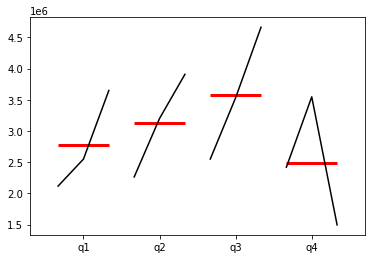

In [ ]:
print('\n Quaterly Data Seasonal Plot')
q_plot = quarter_plot(quarterly_revenue)


 Monthly Data Seasonal Plot


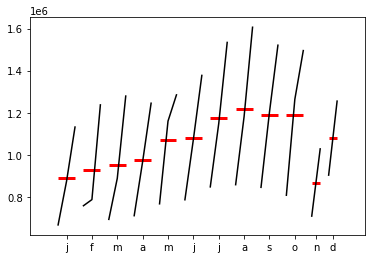

In [ ]:
print('\n Monthly Data Seasonal Plot')
m_plot = month_plot(monthly_revenue_1)

**Observation:**

A seasonal plot allows the underlying seasonal pattern to be seen more clearly.

In this case, The monthly revenue drop during the first months of the year. There is an upward trend in revenue from March to August. The monthly revenue reaches its highest peak in August. Then, it drops from September to November. The graph also shows a small revenue increase again in December.

### Group the daily data into seasonal cateries: Spring, Summer, Autumn and Winter

0: Winter - 1: Spring - 2:Summer - 3:Fall

* Spring months in Turkey begin from March to May. 

* Summer months in Turkey begin from June to August. 

* Autumn months in turkey begin from September to November. 

* Winter months in Turkey begin from December to February

#### Hypotheis Testing: Compare the monthly revenue between four seasons - Does monthly revenue differ by seasons?

##### Group the monthly data into seasonal cateries: Spring, Summer, Autumn and Winter
 



In [ ]:
daily.head(5)

revenue     stock   sales  Holiday  national_unity_day  \
2017-01-02  20054.35  210277.0  6795.0      0.0                 0.0   
2017-01-03  19030.64  208991.0  6558.0      0.0                 0.0   
2017-01-04  19660.48  207727.0  6594.0      0.0                 0.0   
2017-01-05  18506.37  208901.0  6418.0      0.0                 0.0   
2017-01-06  20461.74  208792.0  7160.0      0.0                 0.0   

            labour_holiday  new_year_holiday  victory day  black friday  \
2017-01-02             0.0               0.0          0.0           0.0   
2017-01-03             0.0               0.0          0.0           0.0   
2017-01-04             0.0               0.0          0.0           0.0   
2017-01-05             0.0               0.0          0.0           0.0   
2017-01-06             0.0               0.0          0.0           0.0   

            Christmas  Sacrifice feast  Ramadan  
2017-01-02        0.0              0.0      0.0  
2017-01-03        0.0              0.0      0.0  
2017-01-04        0.0              0.0      0.0  
2017-01-05        0.0              0.0      0.0  
2017-01-06        0.0              0.0      0.0

In [ ]:
daily['month'] = daily.index.month
daily


revenue     stock   sales  Holiday  national_unity_day  \
2017-01-02  20054.35  210277.0  6795.0      0.0                 0.0   
2017-01-03  19030.64  208991.0  6558.0      0.0                 0.0   
2017-01-04  19660.48  207727.0  6594.0      0.0                 0.0   
2017-01-05  18506.37  208901.0  6418.0      0.0                 0.0   
2017-01-06  20461.74  208792.0  7160.0      0.0                 0.0   
...              ...       ...     ...      ...                 ...   
2019-10-27  51751.19  272923.0  8206.0      0.0                 0.0   
2019-10-28  48833.57  270211.0  7197.0      0.0                 0.0   
2019-10-29  48874.57  276714.0  7116.0      0.0                 0.0   
2019-10-30  37095.38  274087.0  5929.0      0.0                 0.0   
2019-10-31  36089.71  273422.0  5783.0      0.0                 0.0   

            labour_holiday  new_year_holiday  victory day  black friday  \
2017-01-02             0.0               0.0          0.0           0.0   
2017-01-03             0.0               0.0          0.0           0.0   
2017-01-04             0.0               0.0          0.0           0.0   
2017-01-05             0.0               0.0          0.0           0.0   
2017-01-06             0.0               0.0          0.0           0.0   
...                    ...               ...          ...           ...   
2019-10-27             0.0               0.0          0.0           0.0   
2019-10-28             0.0               0.0          0.0           0.0   
2019-10-29             0.0               0.0          0.0           0.0   
2019-10-30             0.0               0.0          0.0           0.0   
2019-10-31             0.0               0.0          0.0           0.0   

            Christmas  Sacrifice feast  Ramadan  month  
2017-01-02        0.0              0.0      0.0      1  
2017-01-03        0.0              0.0      0.0      1  
2017-01-04        0.0              0.0      0.0      1  
2017-01-05        0.0              0.0      0.0      1  
2017-01-06        0.0              0.0      0.0      1  
...               ...              ...      ...    ...  
2019-10-27        0.0              0.0      0.0     10  
2019-10-28        0.0              0.0      0.0     10  
2019-10-29        0.0              0.0      0.0     10  
2019-10-30        0.0              0.0      0.0     10  
2019-10-31        0.0              0.0      0.0     10  

[1033 rows x 13 columns]

In [ ]:
# Winter = 0
daily.loc[(daily['month'] == 12),'seasonality'] = 0
daily.loc[(daily['month'] == 1),'seasonality'] = 0
daily.loc[(daily['month'] == 2),'seasonality'] = 0


# Spring = 1
daily.loc[(daily['month'] == 3),'seasonality'] = 1
daily.loc[(daily['month'] == 4),'seasonality'] = 1
daily.loc[(daily['month'] == 5),'seasonality'] = 1

# Summer = 2
daily.loc[(daily['month'] == 6),'seasonality'] = 2
daily.loc[(daily['month'] == 7),'seasonality'] = 2
daily.loc[(daily['month'] == 8),'seasonality'] = 2

# Autumn =3
daily.loc[(daily['month'] == 9),'seasonality'] = 3
daily.loc[(daily['month'] == 10),'seasonality'] = 3
daily.loc[(daily['month'] == 11),'seasonality'] = 3

#Christmas and New year
#daily_df.loc[(daily_df['month'] == 12),'seasonality'] = 'Christmas and New Year'

In [ ]:
daily.head(5)

revenue     stock   sales  Holiday  national_unity_day  \
2017-01-02  20054.35  210277.0  6795.0      0.0                 0.0   
2017-01-03  19030.64  208991.0  6558.0      0.0                 0.0   
2017-01-04  19660.48  207727.0  6594.0      0.0                 0.0   
2017-01-05  18506.37  208901.0  6418.0      0.0                 0.0   
2017-01-06  20461.74  208792.0  7160.0      0.0                 0.0   

            labour_holiday  new_year_holiday  victory day  black friday  \
2017-01-02             0.0               0.0          0.0           0.0   
2017-01-03             0.0               0.0          0.0           0.0   
2017-01-04             0.0               0.0          0.0           0.0   
2017-01-05             0.0               0.0          0.0           0.0   
2017-01-06             0.0               0.0          0.0           0.0   

            Christmas  Sacrifice feast  Ramadan  month  seasonality  
2017-01-02        0.0              0.0      0.0      1          0.0  
2017-01-03        0.0              0.0      0.0      1          0.0  
2017-01-04        0.0              0.0      0.0      1          0.0  
2017-01-05        0.0              0.0      0.0      1          0.0  
2017-01-06        0.0              0.0      0.0      1          0.0

##### Using ANOVA Testing to compare the monthly revenue between four seasons

In [ ]:
!pip install -U scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy.stats

In [ ]:
daily.shape

(1033, 14)

State the hypothesis

* H_0 = µ\_Winter = µ\_Spring = µ\_summer = µ\_Autumn
* H_1 : At least one of the means differ

Levene’s Test: Test for equality of variance

In [ ]:
scipy.stats.levene(daily[daily['seasonality'] == 0]['revenue'],
                   daily[daily['seasonality'] == 1]['revenue'],
                   daily[daily['seasonality'] == 2]['revenue'],
                   daily[daily['seasonality'] == 3]['revenue'],
                   center = 'mean')

LeveneResult(statistic=2.80372513386079, pvalue=0.038759248353529924)

the p-value is not less than 0.05. This means we do not have sufficient evidence to say that the variance in revenue between the four seasons is significantly different. Four season have equal variances

In [ ]:
# Extract the revenue and group by seasons

revenue_winter = daily[daily['seasonality'] == 0]['revenue']
revenue_spring = daily[daily['seasonality'] == 1]['revenue']
revenue_summer = daily[daily['seasonality'] == 2]['revenue']
revenue_autumn = daily[daily['seasonality'] == 3]['revenue']

In [ ]:
#one-way ANOVA
from scipy.stats import f_oneway
anova_result = f_oneway(revenue_winter,revenue_spring,revenue_summer,revenue_autumn) 
anova_result

F_onewayResult(statistic=15.839348832784774, pvalue=4.4923891831905737e-10)

In [ ]:
anova_result.pvalue 

if anova_result.pvalue < 0.05: 
     print('Reject H0 - at least one of the means differ.') 
else:
      print('Fail to reject H0 - equal mean between 4 groups')     


Reject H0 - at least one of the means differ.


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that **at least one of the means differ.**

<BarContainer object of 4 artists>

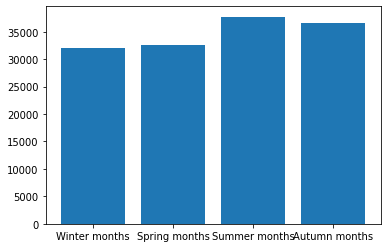

In [ ]:
# visualize the average monthly revenue between 4 seasons
x_label = ['Winter months','Spring months','Summer months','Autumn months']
y_label = [revenue_winter.mean(),
           revenue_spring.mean(),
           revenue_summer.mean(),
           revenue_autumn.mean()
           ]
plt.bar(x_label, y_label)


According to the graph, the summer season has the highest average revenue. The season with the second highest average revenue is autumn. Winter and Spring seasons have a low equal average revenue

##### T-Test: Compare the average revenue between seasons by pair

In [ ]:
import scipy.stats
from scipy.stats import ttest_ind, ttest_rel

###### Is revenue in summer months higher than in Autumn months?

In [ ]:
ttest_ind?

In [ ]:
# H0: revenue_summer = revenue_autumn
# H1: revenue_summer > revenue_autumn
ttest_result_1 = ttest_ind(a=revenue_summer, b=revenue_autumn, equal_var=False, alternative='greater')
ttest_result_1

Ttest_indResult(statistic=1.1730587842528855, pvalue=0.12066686401523823)

In [ ]:
ttest_result_1.pvalue

if ttest_result_1.pvalue < 0.05:
  print('reject H0 - This means summer greater than autumn')
else:
  print('Fail to reject H0 - this means summer = autumn')

Fail to reject H0 - this means summer = autumn


<BarContainer object of 2 artists>

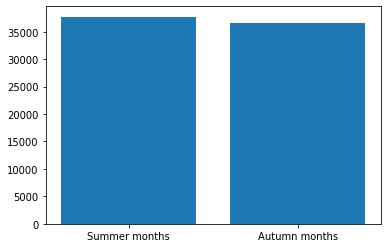

In [ ]:
x_label = ['Summer months','Autumn months']
y_label = [revenue_summer.mean(),
           revenue_autumn.mean()
           ]
plt.bar(x_label, y_label)


**Conclusion:**

The p_value is higher than the alpha value 0.05, we fail to reject the null hypothesis as there is not enough proof that there is a statistical difference in average revenue in the summer and autumn. 

Although the graph shows that the average revenue in the summer months is slightly higher than the average revenue in the autumn months, it not high enough to conclude it is statistically significant between the 2 variables. Then, we just conclude it is by chance

###### Is revenue in Spring months higher than in Winter months?

In [ ]:
#H0: # H0: revenue_spring = revenue_winter
# H1: revenue_spring > revenue_winter

ttest_result_2 = ttest_ind(a=revenue_spring, b=revenue_winter, equal_var=False, alternative='two-sided')
ttest_result_2

Ttest_indResult(statistic=0.5999178712417941, pvalue=0.5488469909498281)

<BarContainer object of 2 artists>

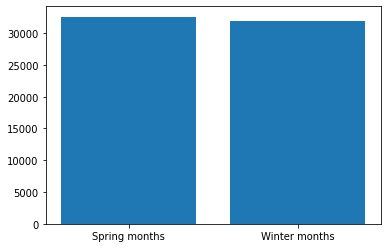

In [ ]:
x_label = ['Spring months','Winter months']
y_label = [revenue_spring.mean(),
           revenue_winter.mean()
           ]
plt.bar(x_label, y_label)

**Conclusion:**

The p_value is higher than the alpha value 0.05, we fail to reject the null hypothesis as there is not enough proof that there is a statistical difference in average revenue in the spring and winter seasons. 

The average revenue in the spring months is equal to the average revenue in the winter months

###### Is revenue in Spring months lower than in Autumn months?

In [ ]:
ttest_result_3 = ttest_ind(a=revenue_spring, b=revenue_autumn, equal_var=False, alternative='less')
ttest_result_3

Ttest_indResult(statistic=-3.888030393565861, pvalue=5.7614396945347185e-05)

**Conclusion:**
Since the p-value is less than 0.05, we reject the null hypothesis as there is enough proof that the average revenue in spring is statistically lower than the average revenue in autumn

###### Is revenue in Summer months greater than in Winter months?

In [ ]:
ttest_result_4 = ttest_ind(a=revenue_summer, b=revenue_winter, equal_var=False, alternative='greater')
ttest_result_4

Ttest_indResult(statistic=5.531248419116798, pvalue=2.589210491042846e-08)

**Conclusion:**
Since the p-value is less than 0.05, we reject the null hypothesis as there is enough proof that the average revenue in summer is statistically higher than the average revenue in winter

## Whether or not the number of store_id, product_id and Stock changed have an impact on revenue

### Total number of stores and products by date

In [ ]:
daily = daily.reset_index()


In [ ]:
daily.head(5)

index   revenue     stock   sales  Holiday
0 2017-01-02  20054.35  210277.0  6795.0      0.0
1 2017-01-03  19030.64  208991.0  6558.0      0.0
2 2017-01-04  19660.48  207727.0  6594.0      0.0
3 2017-01-05  18506.37  208901.0  6418.0      0.0
4 2017-01-06  20461.74  208792.0  7160.0      0.0

In [ ]:
daily.columns = ['date','revenue','stock','sales','holiday']

In [ ]:
daily_df = sales_df.groupby('date').agg({'store_id':'nunique',
                                         'product_id':'nunique'}).reset_index()

In [ ]:
from datetime import date
daily_df = pd.merge(daily,daily_df,on=['date'],how='inner')
daily_df

date   revenue     stock   sales  holiday  store_id  product_id
0    2017-01-02  20054.35  210277.0  6795.0      0.0       117         314
1    2017-01-03  19030.64  208991.0  6558.0      0.0       117         314
2    2017-01-04  19660.48  207727.0  6594.0      0.0       117         315
3    2017-01-05  18506.37  208901.0  6418.0      0.0       117         310
4    2017-01-06  20461.74  208792.0  7160.0      0.0       117         317
...         ...       ...       ...     ...      ...       ...         ...
1028 2019-10-27  51751.19  272923.0  8206.0      0.0       140         581
1029 2019-10-28  48833.57  270211.0  7197.0      0.0       140         578
1030 2019-10-29  48874.57  276714.0  7116.0      0.0       140         579
1031 2019-10-30  37095.38  274087.0  5929.0      0.0       140         580
1032 2019-10-31  36089.71  273422.0  5783.0      0.0       139         579

[1033 rows x 7 columns]

In [ ]:
daily_df.head(5)

date   revenue     stock   sales  holiday  store_id  product_id
0 2017-01-02  20054.35  210277.0  6795.0      0.0       117         314
1 2017-01-03  19030.64  208991.0  6558.0      0.0       117         314
2 2017-01-04  19660.48  207727.0  6594.0      0.0       117         315
3 2017-01-05  18506.37  208901.0  6418.0      0.0       117         310
4 2017-01-06  20461.74  208792.0  7160.0      0.0       117         317

In [ ]:
daily_df['date'] = pd.to_datetime(daily_df['date'])

# create new year, month columns
daily_df['year'] = daily_df['date'].dt.year
daily_df['month'] = daily_df['date'].dt.month
daily_df['dayofweek'] = daily_df['date'].dt.weekday


In [ ]:
# Winter = 0
daily_df.loc[(daily_df['month'] == 12),'seasonality'] = 0
daily_df.loc[(daily_df['month'] == 1),'seasonality'] = 0
daily_df.loc[(daily_df['month'] == 2),'seasonality'] = 0


# Spring = 1
daily_df.loc[(daily_df['month'] == 3),'seasonality'] = 1
daily_df.loc[(daily_df['month'] == 4),'seasonality'] = 1
daily_df.loc[(daily_df['month'] == 5),'seasonality'] = 1

# Summer = 2
daily_df.loc[(daily_df['month'] == 6),'seasonality'] = 2
daily_df.loc[(daily_df['month'] == 7),'seasonality'] = 2
daily_df.loc[(daily_df['month'] == 8),'seasonality'] = 2

# Autumn =3
daily_df.loc[(daily_df['month'] == 9),'seasonality'] = 3
daily_df.loc[(daily_df['month'] == 10),'seasonality'] = 3
daily_df.loc[(daily_df['month'] == 11),'seasonality'] = 3

#Christmas and New year
#daily_df.loc[(daily_df['month'] == 12),'seasonality'] = 'Christmas and New Year'

In [ ]:
daily_df.head(5)

date   revenue     stock   sales  holiday  store_id  product_id  year  \
0 2017-01-02  20054.35  210277.0  6795.0      0.0       117         314  2017   
1 2017-01-03  19030.64  208991.0  6558.0      0.0       117         314  2017   
2 2017-01-04  19660.48  207727.0  6594.0      0.0       117         315  2017   
3 2017-01-05  18506.37  208901.0  6418.0      0.0       117         310  2017   
4 2017-01-06  20461.74  208792.0  7160.0      0.0       117         317  2017   

   month  dayofweek  seasonality  
0      1          0          0.0  
1      1          1          0.0  
2      1          2          0.0  
3      1          3          0.0  
4      1          4          0.0

In [ ]:
daily_df.columns = ['date','revenue','stock','units_sold','holiday','number_of_storeid','number_of_productid','year','month','dayofweek','seasonality']

In [ ]:
daily_df.head(5)

date   revenue     stock  units_sold  holiday  number_of_storeid  \
0 2017-01-02  20054.35  210277.0      6795.0      0.0                117   
1 2017-01-03  19030.64  208991.0      6558.0      0.0                117   
2 2017-01-04  19660.48  207727.0      6594.0      0.0                117   
3 2017-01-05  18506.37  208901.0      6418.0      0.0                117   
4 2017-01-06  20461.74  208792.0      7160.0      0.0                117   

   number_of_productid  year  month  dayofweek  seasonality  
0                  314  2017      1          0          0.0  
1                  314  2017      1          1          0.0  
2                  315  2017      1          2          0.0  
3                  310  2017      1          3          0.0  
4                  317  2017      1          4          0.0

#### Number of Stores Distribition

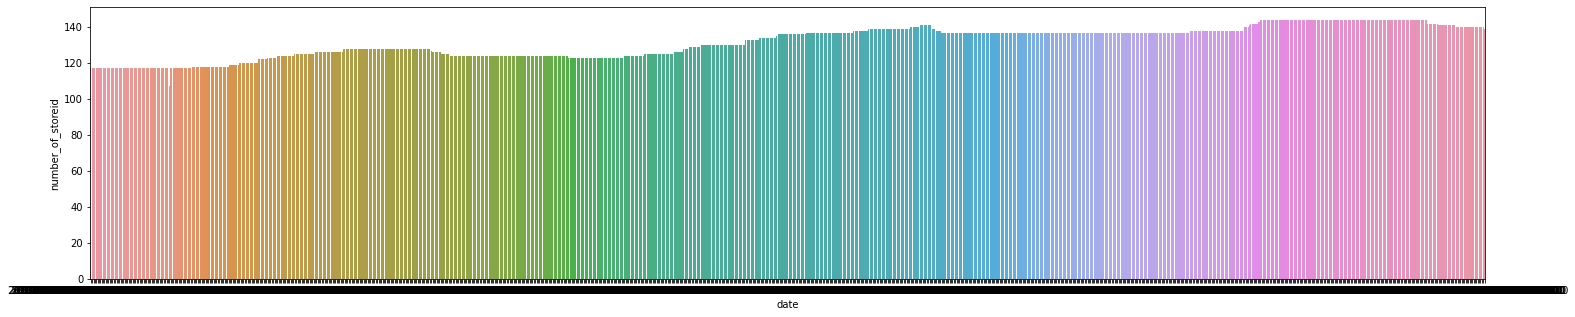

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot(x='date',y='number_of_storeid',data=daily_df)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Two-Way ANOVA testing: Whether or not the revenue is influenced by seasonality and number of stores?

In [ ]:
model = ols('revenue ~ seasonality + number_of_storeid + seasonality:number_of_storeid', data=daily_df).fit()
anova_table = sm.stats.anova_lm(model,typ=2)
anova_table

sum_sq      df           F         PR(>F)
seasonality                    6.539173e+08     1.0    9.474693   2.138417e-03
number_of_storeid              6.492387e+10     1.0  940.690380  2.989516e-147
seasonality:number_of_storeid  2.185308e+09     1.0   31.663218   2.363033e-08
Residual                       7.101876e+10  1029.0         NaN            NaN

**Conclusion:**

There is significant interaction effect between seasonality and the number of stores on revenue  

The p-value for number of stores is much smaller than 0.05. Therefore, this tell us that **number of stores have more statistically significant effect on revenue.**

### Whether or not the revenue is influenced by the **Sales Quantity and Seasonality**?

####Sales Quantity Distribution

Text(0.5, 1.0, 'Daily Sales Quantity')

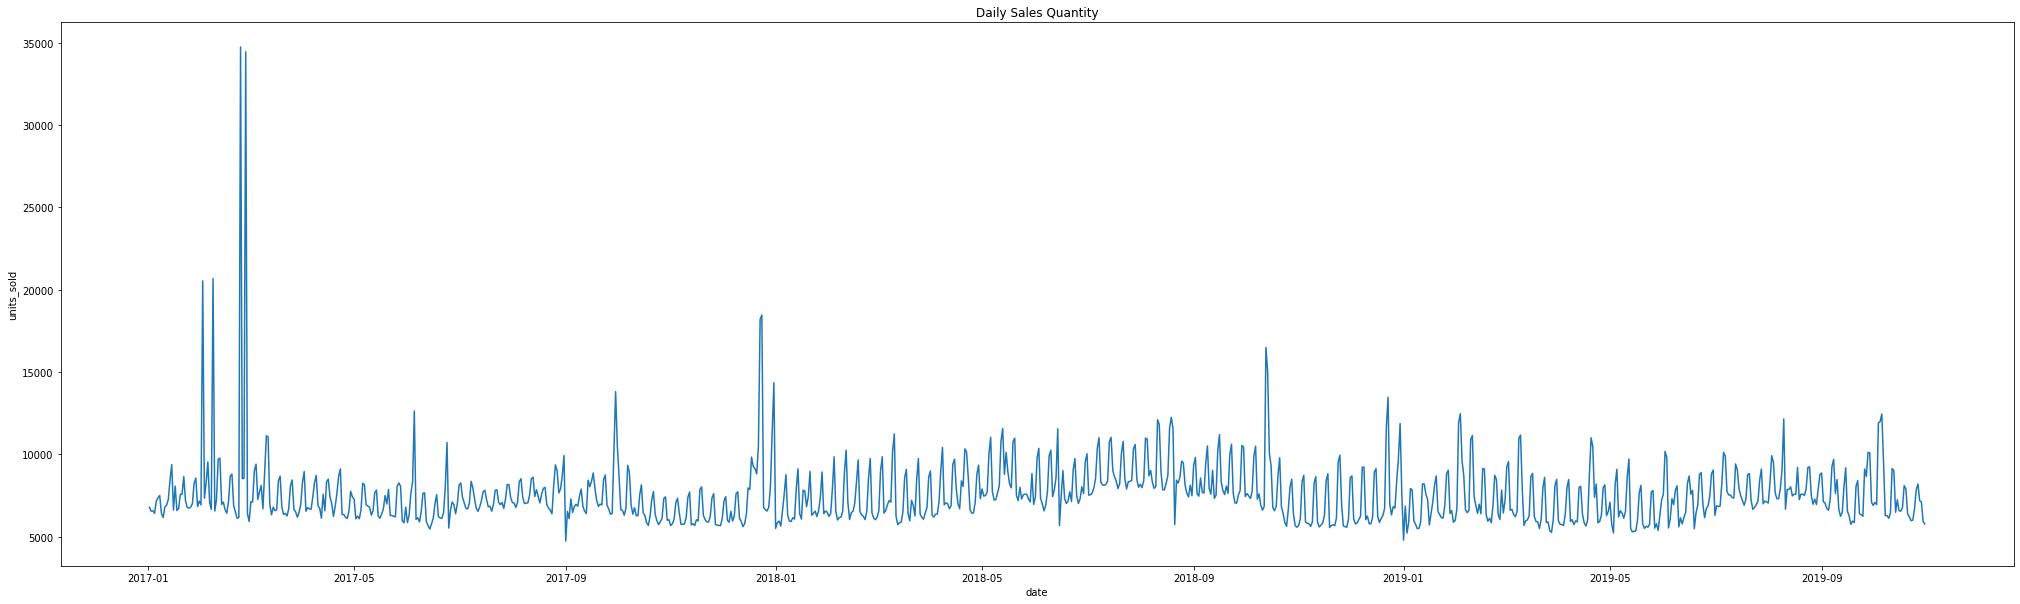

In [ ]:
plt.figure(figsize=(35,10))
sns.lineplot(x='date',y='units_sold',data=daily_df)
plt.title('Daily Sales Quantity')

#### Two-Way ANOVA testing: Whether or not the revenue is influenced by seasonality and sales quantity?

In [ ]:
model_1 = ols('revenue ~ seasonality + units_sold + seasonality:units_sold', data=daily_df).fit()
anovatable = sm.stats.anova_lm(model_1,typ=2)
anovatable

sum_sq      df           F        PR(>F)
seasonality             5.015852e+09     1.0   55.330760  2.143833e-13
units_sold              3.920717e+10     1.0  432.501339  1.809461e-80
seasonality:units_sold  5.639705e+09     1.0   62.212594  7.839236e-15
Residual                9.328105e+10  1029.0         NaN           NaN

There is significant interaction effect between seasonality and the number of unit sold on revenue

The p-value for number of sales quantity is much smaller than 0.05. Therefore, this tell us that number ofsales quantity have more statistically significant effect on revenue.

### Whether or not the **seasonality and number of product_id effect on revenue**?

#### Product_id Distribition

Text(0.5, 1.0, 'Number of unique products change day by day')

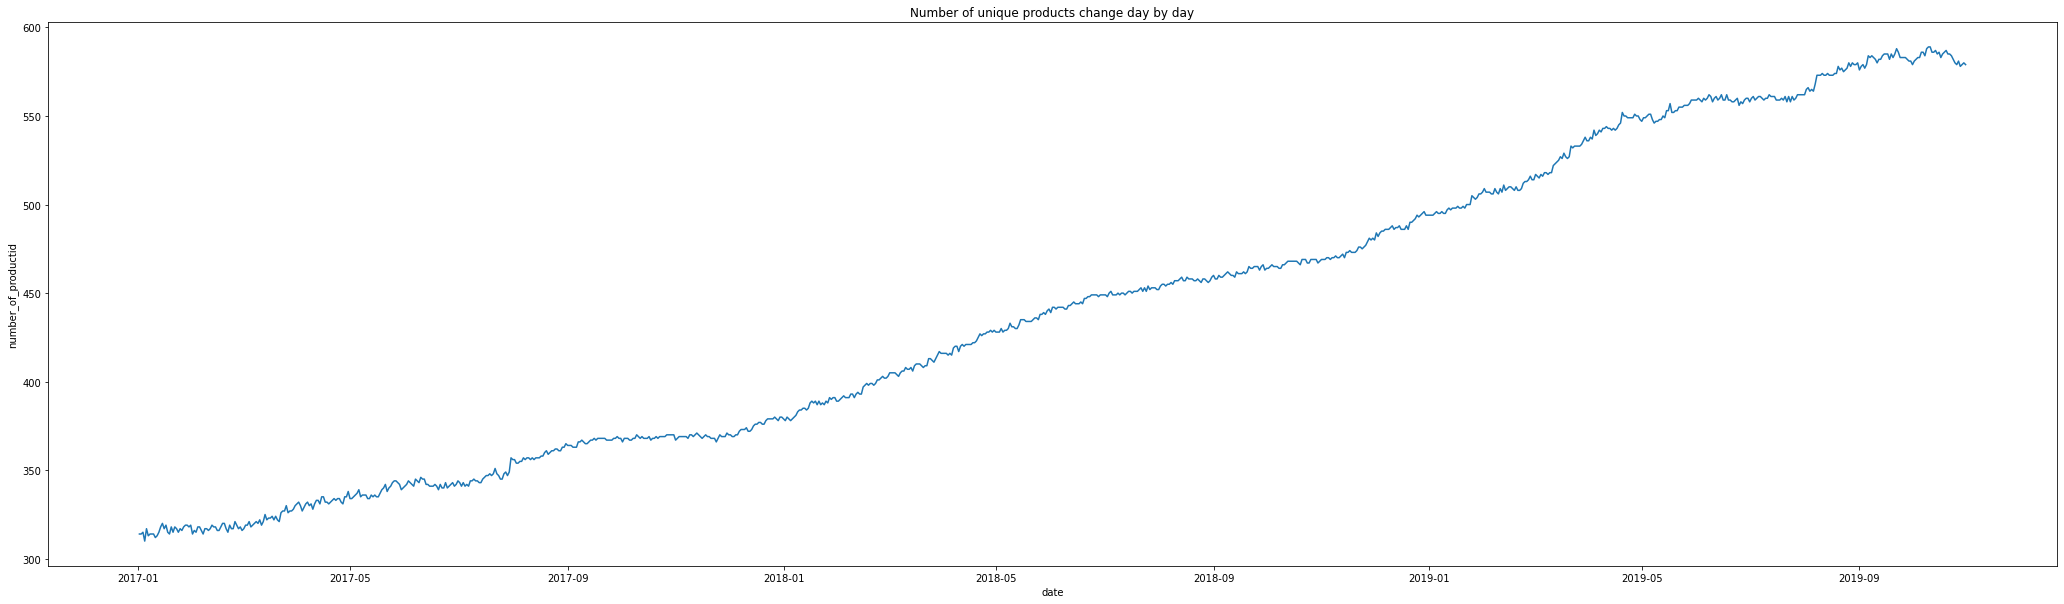

In [ ]:
plt.figure(figsize=(36,10))
sns.lineplot(x='date',y='number_of_productid',data=daily_df)
plt.title('Number of unique products change day by day')

Text(0.5, 1.0, 'Number of product_id on each season')

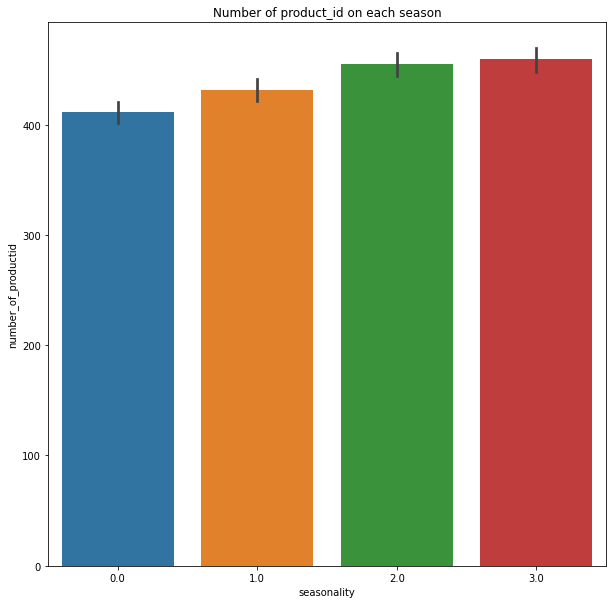

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='seasonality',y='number_of_productid',data=daily_df)
plt.title('Number of product_id on each season')

#### Two-Way ANOVA testing: Whether or not the revenue is influenced by **seasonality and number of product_id**?

In [ ]:
model_2 = ols('revenue ~ seasonality + number_of_productid + seasonality:number_of_productid', data=daily_df).fit()
anova_table = sm.stats.anova_lm(model_2,typ=2)
anova_table

sum_sq      df            F  \
seasonality                      8.800687e+07     1.0     1.311586   
number_of_productid              6.860236e+10     1.0  1022.395830   
seasonality:number_of_productid  4.800808e+08     1.0     7.154748   
Residual                         6.904549e+10  1029.0          NaN   

                                        PR(>F)  
seasonality                       2.523741e-01  
number_of_productid              2.424811e-156  
seasonality:number_of_productid   7.595170e-03  
Residual                                   NaN

**Conclusion:**

There is no significant interaction effect between seasonality and the number of product_id on daily revenue.

However, the p-value for number of product_id is much smaller than 0.05. Therefore, this tell us that **number of product_id have statistically significant effect on revenue.**

### Whether or not the **seasonality and stock effect on revenue**?

#### Two-Way ANOVA testing: Whether or not the revenue is influenced by **seasonality and stock**?

In [ ]:
model_3 = ols('revenue ~ seasonality + stock + seasonality:stock', data=daily_df).fit()
anova_table = sm.stats.anova_lm(model_3,typ=2)
anova_table

sum_sq      df           F        PR(>F)
seasonality        1.651749e+09     1.0   16.632061  4.887968e-05
stock              3.508740e+10     1.0  353.307716  5.460218e-68
seasonality:stock  8.493330e+08     1.0    8.552241  3.526644e-03
Residual           1.021912e+11  1029.0         NaN           NaN

### Price of products effect on revenue

In [ ]:
sales_df

product_id store_id       date  sales  revenue  stock  price
0             P0001    S0002 2017-01-02      0     0.00      8   6.25
1             P0001    S0012 2017-01-02      1     5.30      0   6.25
2             P0001    S0013 2017-01-02      2    10.59      0   6.25
3             P0001    S0023 2017-01-02      0     0.00      6   6.25
4             P0001    S0025 2017-01-02      0     0.00      1   6.25
...             ...      ...        ...    ...      ...    ...    ...
18264071      P0748    S0125 2019-10-31      0     0.00     11  18.90
18264072      P0748    S0126 2019-10-31      0     0.00      4  18.90
18264073      P0748    S0131 2019-10-31      0     0.00      6  18.90
18264074      P0748    S0132 2019-10-31      0     0.00      2  18.90
18264075      P0748    S0142 2019-10-31      0     0.00     16  18.90

[18264076 rows x 7 columns]

In [ ]:
sales_df['month_of_year'] = pd.to_datetime(sales_df['date']).dt.to_period('M')
sales_df['year'] = sales_df['date'].dt.year
sales_df



product_id store_id       date  sales  revenue  stock  price  \
0             P0001    S0002 2017-01-02      0     0.00      8   6.25   
1             P0001    S0012 2017-01-02      1     5.30      0   6.25   
2             P0001    S0013 2017-01-02      2    10.59      0   6.25   
3             P0001    S0023 2017-01-02      0     0.00      6   6.25   
4             P0001    S0025 2017-01-02      0     0.00      1   6.25   
...             ...      ...        ...    ...      ...    ...    ...   
18264071      P0748    S0125 2019-10-31      0     0.00     11  18.90   
18264072      P0748    S0126 2019-10-31      0     0.00      4  18.90   
18264073      P0748    S0131 2019-10-31      0     0.00      6  18.90   
18264074      P0748    S0132 2019-10-31      0     0.00      2  18.90   
18264075      P0748    S0142 2019-10-31      0     0.00     16  18.90   

         month_of_year  year  
0              2017-01  2017  
1              2017-01  2017  
2              2017-01  2017  
3              2017-01  2017  
4              2017-01  2017  
...                ...   ...  
18264071       2019-10  2019  
18264072       2019-10  2019  
18264073       2019-10  2019  
18264074       2019-10  2019  
18264075       2019-10  2019  

[18264076 rows x 9 columns]

In [ ]:
sales_df.groupby('date').agg({'sales':'sum',
                                  'revenue':'sum',
                                  'stock':'sum',
                                  'store_id':'nunique',
                              'product_id':'nunique'}).reset_index()

date  sales   revenue   stock  store_id  product_id
0    2017-01-02   6795  20054.35  210277       117         314
1    2017-01-03   6558  19030.64  208991       117         314
2    2017-01-04   6594  19660.48  207727       117         315
3    2017-01-05   6418  18506.37  208901       117         310
4    2017-01-06   7160  20461.74  208792       117         317
...         ...    ...       ...     ...       ...         ...
1028 2019-10-27   8206  51751.19  272923       140         581
1029 2019-10-28   7197  48833.57  270211       140         578
1030 2019-10-29   7116  48874.57  276714       140         579
1031 2019-10-30   5929  37095.38  274087       140         580
1032 2019-10-31   5783  36089.71  273422       139         579

[1033 rows x 6 columns]

In [ ]:
price_range_month = sales_df.groupby(['month_of_year','price']).apply(list)
price_range_month = pd.DataFrame(price_range_month)
price_range_month


0
month_of_year price                                                     
2017-01       0.25     [product_id, store_id, date, sales, revenue, s...
              0.40     [product_id, store_id, date, sales, revenue, s...
              0.45     [product_id, store_id, date, sales, revenue, s...
              0.50     [product_id, store_id, date, sales, revenue, s...
              0.58     [product_id, store_id, date, sales, revenue, s...
...                                                                  ...
2019-10       499.00   [product_id, store_id, date, sales, revenue, s...
              849.90   [product_id, store_id, date, sales, revenue, s...
              1499.00  [product_id, store_id, date, sales, revenue, s...
              1549.00  [product_id, store_id, date, sales, revenue, s...
              1599.00  [product_id, store_id, date, sales, revenue, s...

[8022 rows x 1 columns]

In [ ]:
from google.colab import files
price_range_month.to_csv('price_range_month.csv',encoding = 'utf-8-sig')
files.download('price_range_month.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


#### The price range across all years

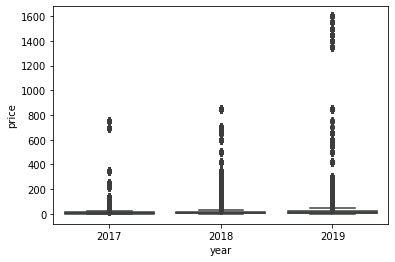

In [ ]:
sns.boxplot(x='year', y='price', data=sales_df)


Text(0.5, 1.0, 'price distribution each month across three years')

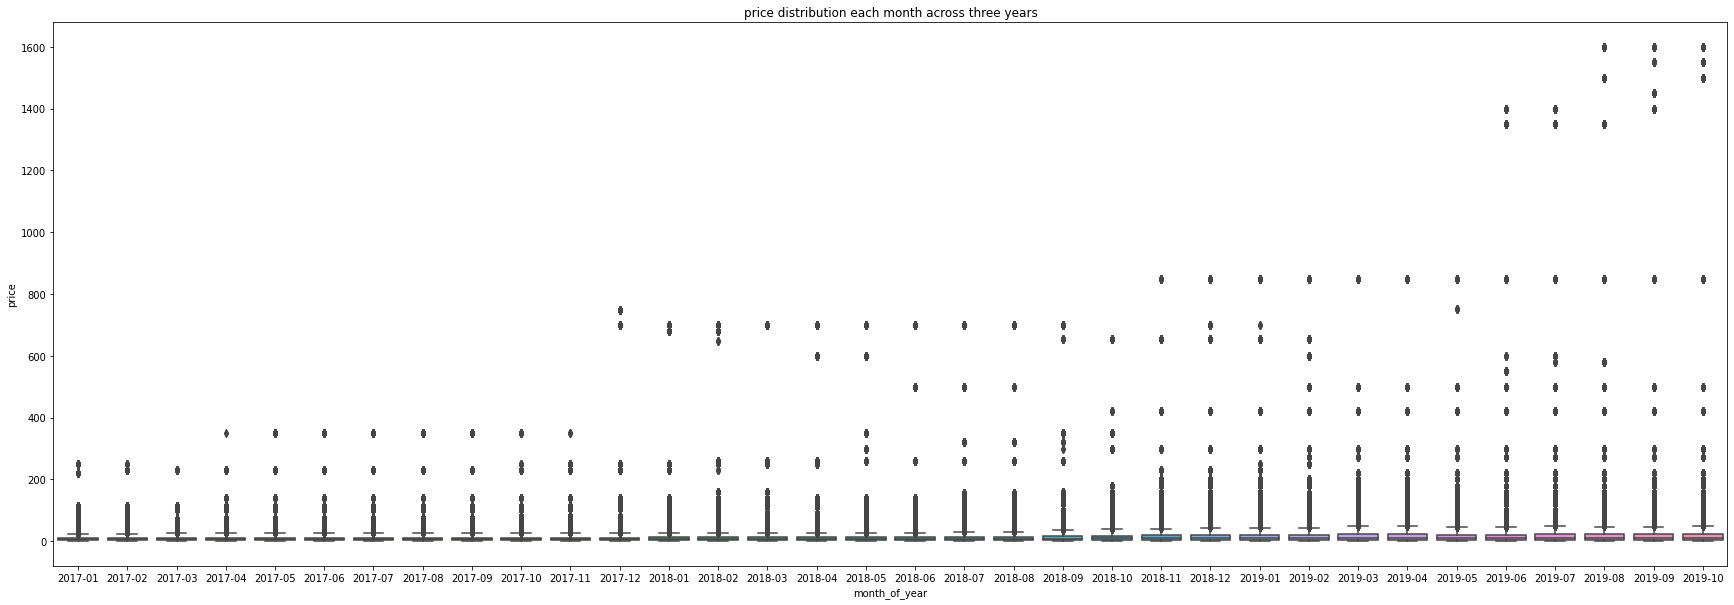

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(x='month_of_year', y='price', data=sales_df)
plt.title('price distribution each month across three years')

2019 has the highest revenue because it sold more expensive products

# Time Series Analysis

## lag plot 
A lag log checks wether a time series is random or not.


In [ ]:
daily_revenue

revenue
2017-01-02  20054.35
2017-01-03  19030.64
2017-01-04  19660.48
2017-01-05  18506.37
2017-01-06  20461.74
...              ...
2019-10-27  51751.19
2019-10-28  48833.57
2019-10-29  48874.57
2019-10-30  37095.38
2019-10-31  36089.71

[1033 rows x 1 columns]

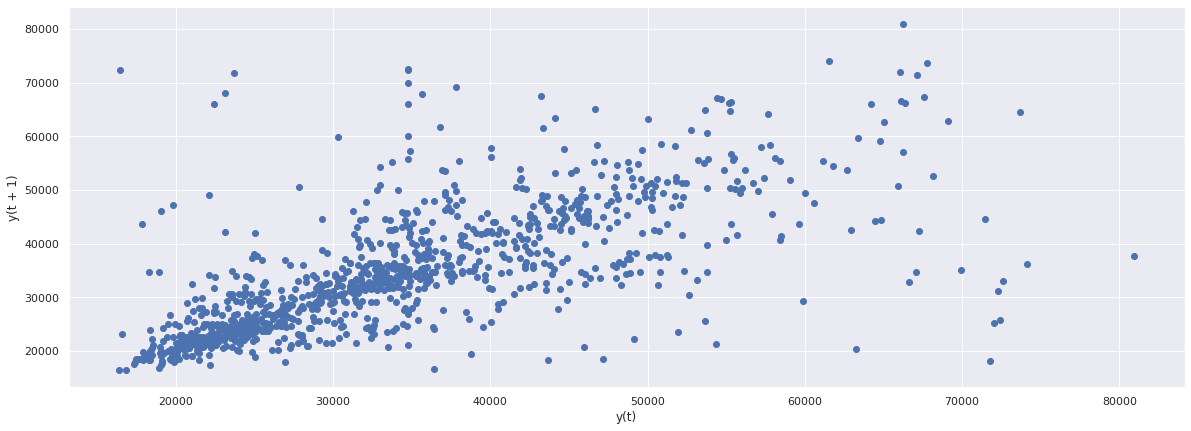

In [ ]:
from pandas.plotting import lag_plot
sns.set()
lag_plot(daily_revenue)

This `daily revenue` data eshibits a linear pattern. This show the data are non-random.
The points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship

## Plot ACF & PACF before Differencing

#### Plot ACF & PACF on Quaterly dataset

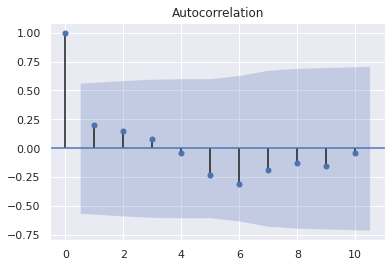

In [ ]:
sm.graphics.tsa.plot_acf(quarterly_revenue, lags=10);

#### Plot ACF & PACF on Monthly dataset

In [ ]:
monthly_revenue_1

revenue
2017-01-31  6.665374e+05
2017-02-28  7.577656e+05
2017-03-31  6.928658e+05
2017-04-30  7.103701e+05
2017-05-31  7.668637e+05
2017-06-30  7.861011e+05
2017-07-31  8.473743e+05
2017-08-31  8.577317e+05
2017-09-30  8.451559e+05
2017-10-31  8.076239e+05
2017-11-30  7.083040e+05
2017-12-31  9.031138e+05
2018-01-31  8.743290e+05
2018-02-28  7.868963e+05
2018-03-31  8.880012e+05
2018-04-30  9.678679e+05
2018-05-31  1.160005e+06
2018-06-30  1.072786e+06
2018-07-31  1.148305e+06
2018-08-31  1.181855e+06
2018-09-30  1.202330e+06
2018-10-31  1.263368e+06
2018-11-30  1.027967e+06
2018-12-31  1.255046e+06
2019-01-31  1.131814e+06
2019-02-28  1.237115e+06
2019-03-31  1.278992e+06
2019-04-30  1.245068e+06
2019-05-31  1.284677e+06
2019-06-30  1.377222e+06
2019-07-31  1.533953e+06
2019-08-31  1.606127e+06
2019-09-30  1.520783e+06
2019-10-31  1.495227e+06

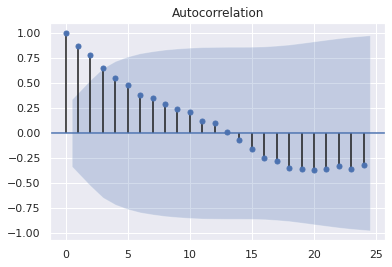

In [ ]:
sm.graphics.tsa.plot_acf(monthly_revenue_1, lags=24);

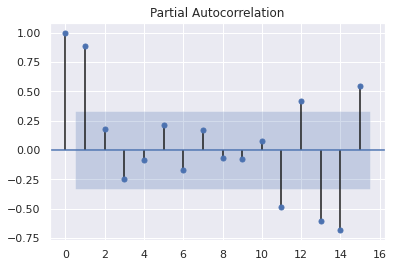

In [ ]:
sm.graphics.tsa.plot_pacf(monthly_revenue_1, lags=15);

lag 11, lag 12, lag 13, lag 14, lag 15

#### Plot ACF & PACF on Weekly dataset

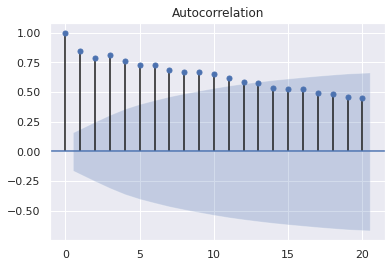

In [ ]:
sm.graphics.tsa.plot_acf(weekly_revenue, lags=20);

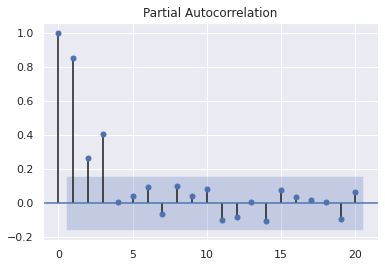

In [ ]:
sm.graphics.tsa.plot_pacf(weekly_revenue, lags=20);

lag 3

#### Plot ACF & PACF on Daily dataset

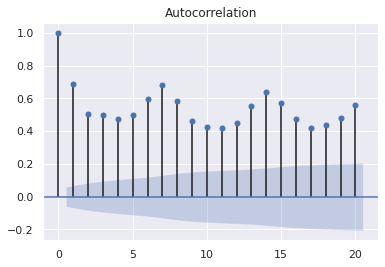

In [ ]:
sm.graphics.tsa.plot_acf(daily_revenue, lags=20);

lag 7 

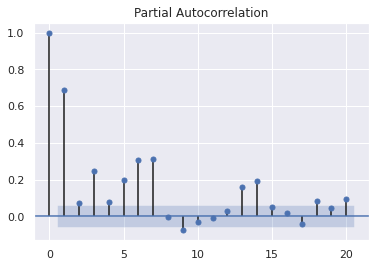

In [ ]:
sm.graphics.tsa.plot_pacf(daily_revenue, lags=20);

lag 5, lag 3, lag 6,7

Observation:

Based on autocorrelation coefficients functions we know that the data have a trend. When data have a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in size. So the ACF of trended time series tend to have positive values that slowly decrease as the lags increase.

When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal frequency) than for other lags. The slow decrease in the ACF as the lags increase is due to the trend, while the “scalloped” shape is due the seasonality.

Therefore the daily revenue plotted in the graph shows both trend and seasonality

## Decomposition of retail sales time series


### Decomposition on monthly dataset


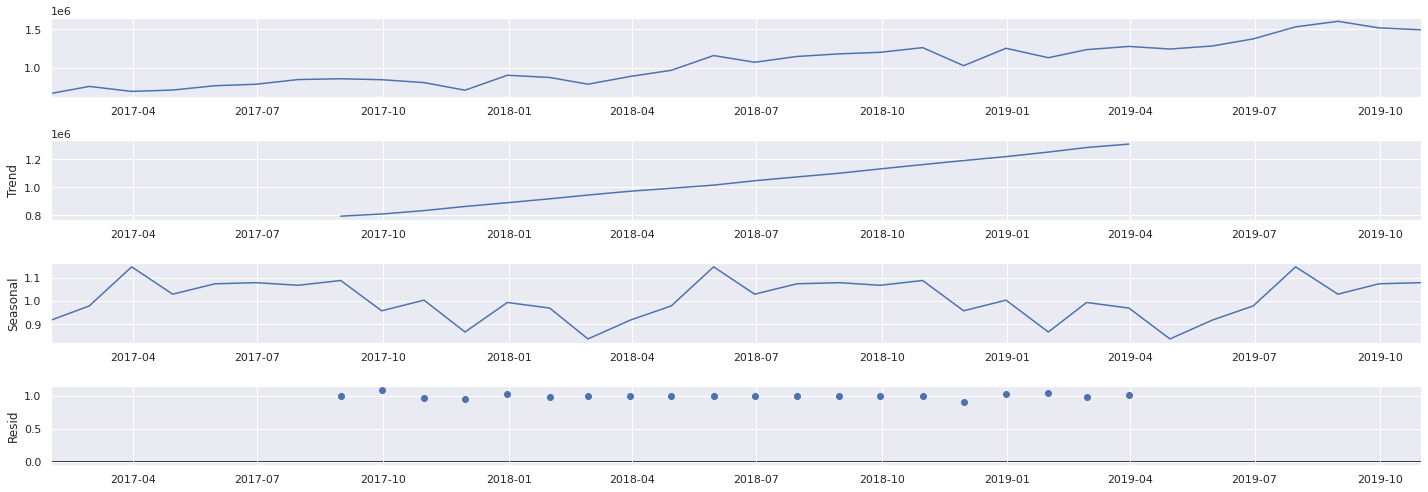

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(monthly_revenue_1, model='multiplicative', period=14)
rcParams["figure.figsize"] = 20, 7
decom.plot();

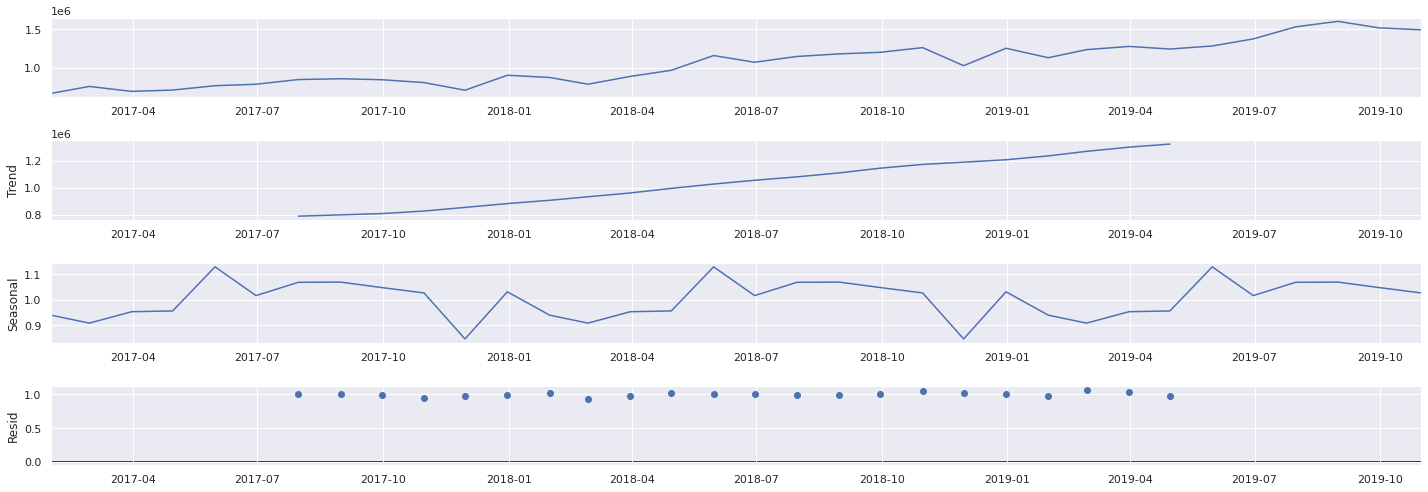

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(monthly_revenue_1, model='multiplicative', period=12)
rcParams["figure.figsize"] = 20, 7
decom.plot();

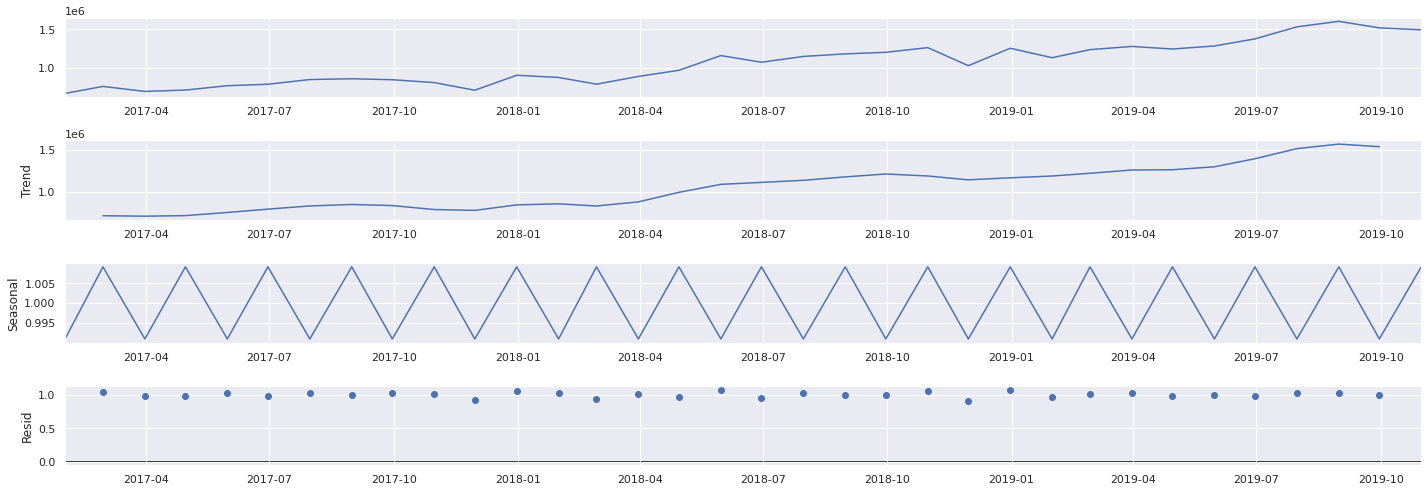

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(monthly_revenue_1, model='multiplicative', period=2)
rcParams["figure.figsize"] = 20, 7
decom.plot();

### Decompostion on Weekly dataset


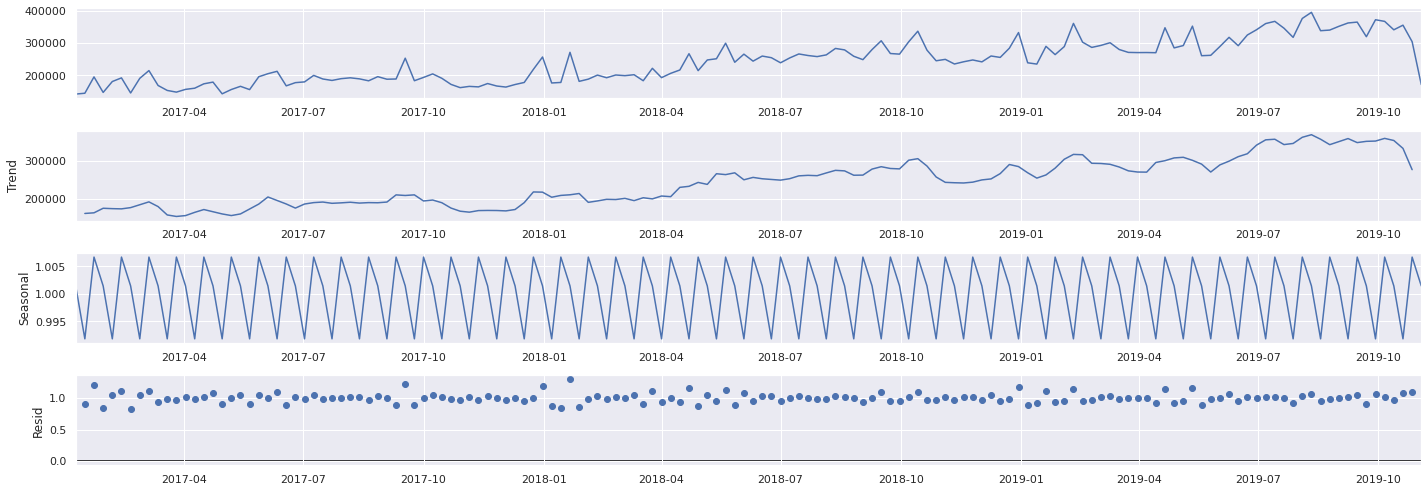

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(weekly_revenue, model='multiplicative', period=3)
rcParams["figure.figsize"] = 20, 7
decom.plot();

### Decomposition on daily dataset

In [ ]:
daily_revenue.head(5)

revenue
2017-01-02  20054.35
2017-01-03  19030.64
2017-01-04  19660.48
2017-01-05  18506.37
2017-01-06  20461.74

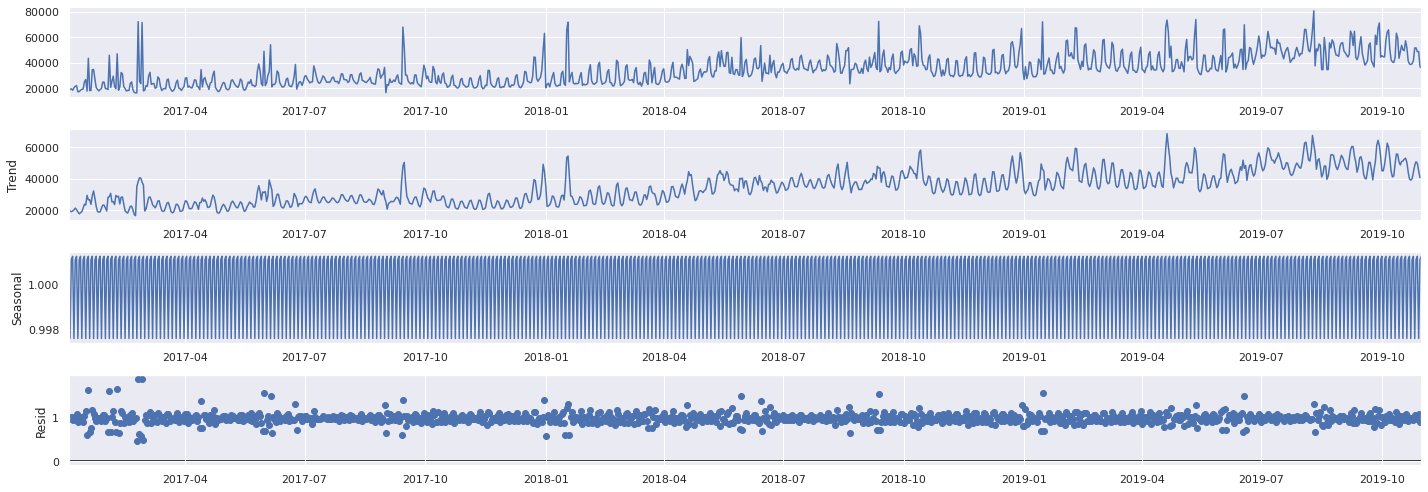

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(daily_revenue, model='multiplicative', period=3)
rcParams["figure.figsize"] = 20, 7
decom.plot();

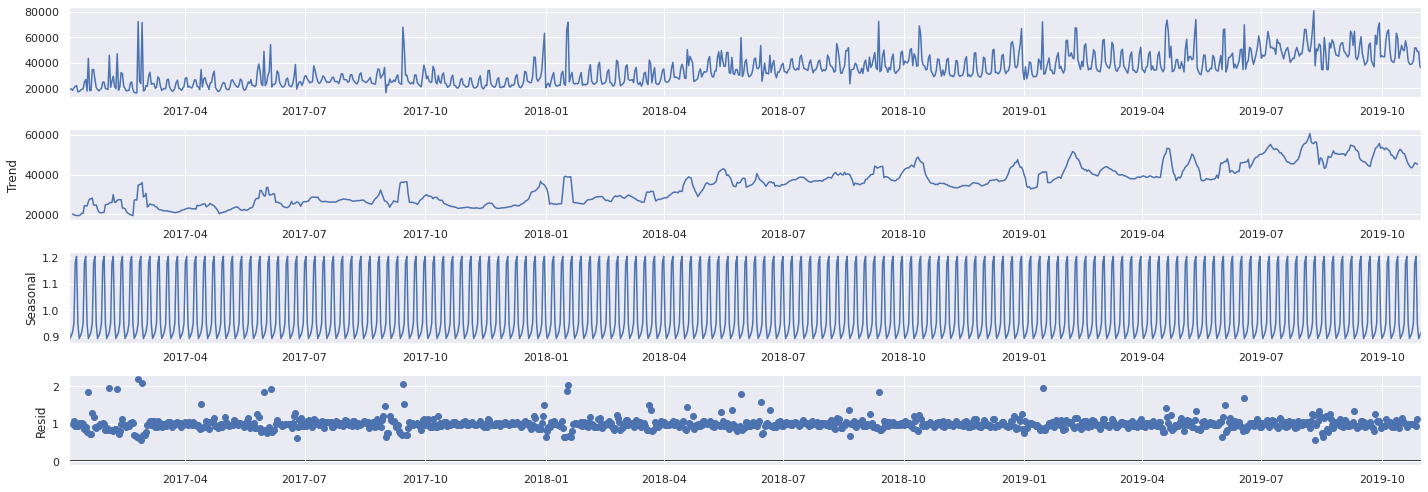

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(daily_revenue, model='multiplicative', period=7)
rcParams["figure.figsize"] = 20, 7
decom.plot();

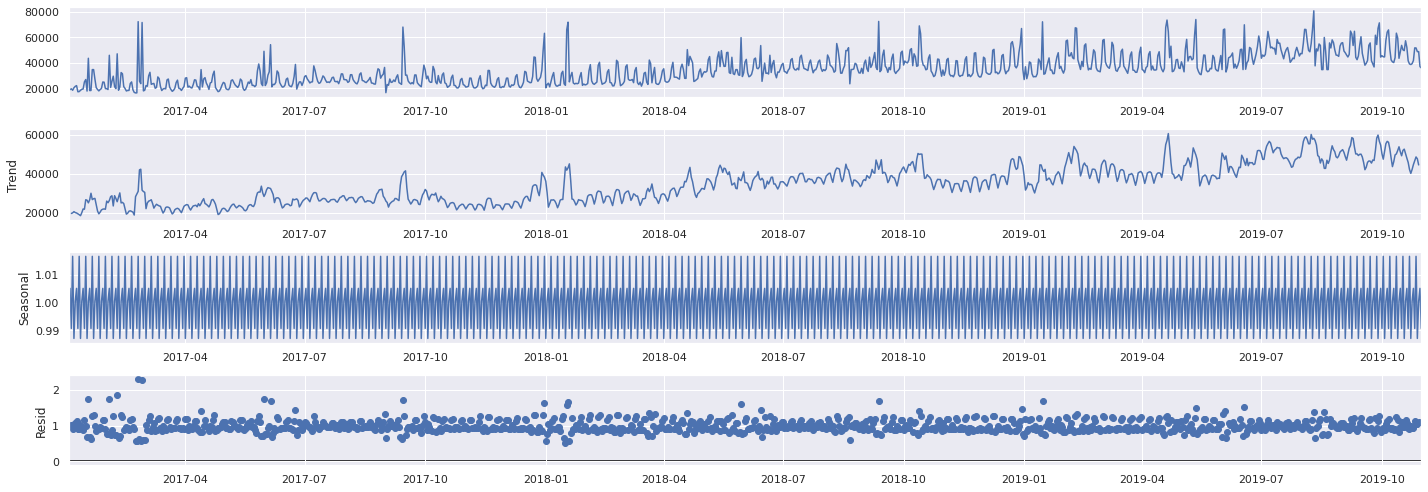

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(daily_revenue, model='multiplicative', period=5)
rcParams["figure.figsize"] = 20, 7
decom.plot();

## Check for Stationarity

In order for time series data to be stationary, the data must exhibit four properties over time:
1. Constant mean
2. constant variance
3. constant autocorrelation structure
4. no periodic component

Note: Autocorrelation simply means that the current time series measurement is correlated with a past measurement. 
When autocorrelation is one or greater. 

There are many methods to check whether a time series is stationary or not stationary

1. Look at plots
2. Summary Statistics
3. Statistical Test

### Visualization - Annual Revenue, Quarterly Revenue, Monthly Revenue, Daily Revenue





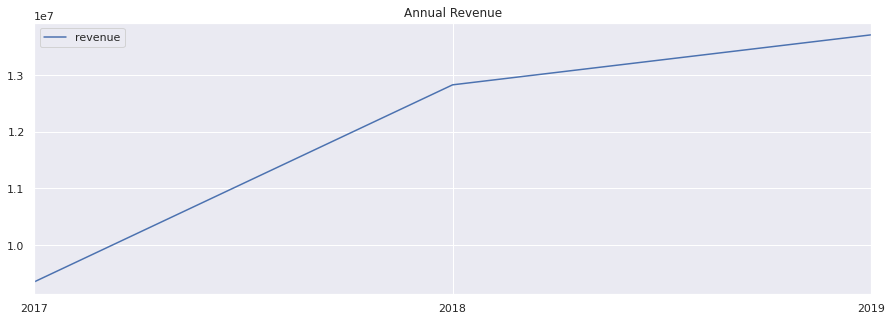

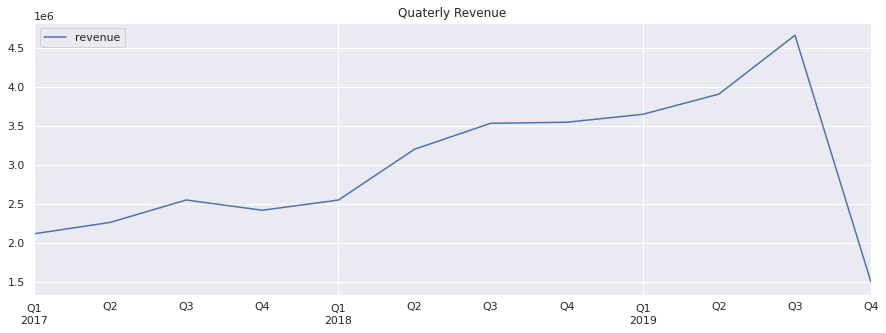

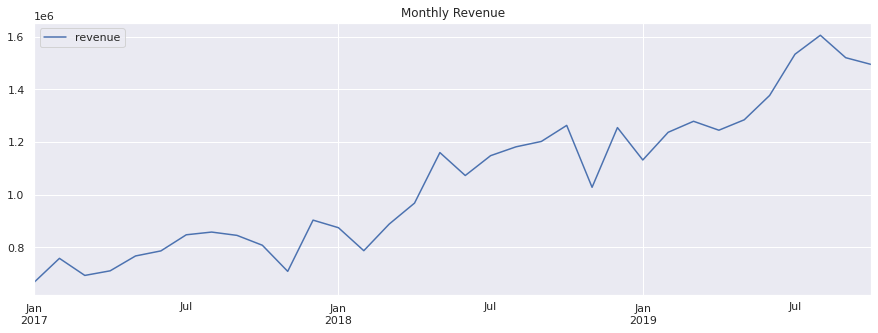

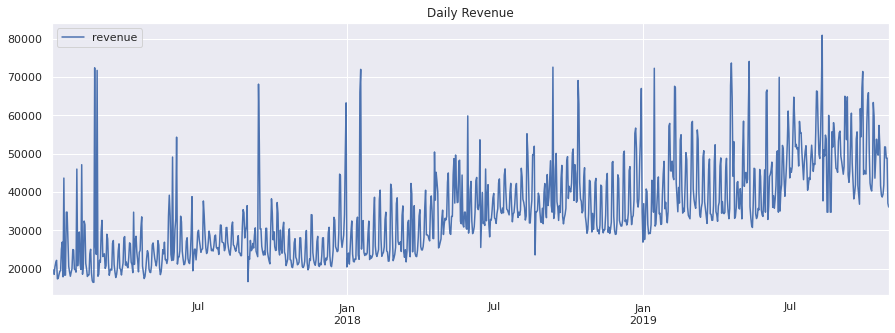

In [ ]:
# plot annually
annual_revenue.plot(figsize=(15,5), title='Annual Revenue')

# plot quarterly
quarterly_revenue.plot(figsize=(15,5), title='Quaterly Revenue')

# plot monthly 
monthly_revenue_1.plot(figsize=(15,5), title='Monthly Revenue')

# plot daily
daily_revenue.plot(figsize=(15,5), title='Daily Revenue')

This dataset is not stationary because the mean, variance changes overtime and there is a periodic component that's very reguar 

### Indentifying Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

#### Summary Statistics 

The easiest way to check for constant mean and variance is to chop up the data into separate chunks, calculate statistics for each chunk and compare. If they differ and the difference is statistically significant, the time series is likely non-stationary

##### quarterly_revenue data

In [ ]:
#splip quarterly data into 4 chunks or sections
chunks = np.split(quarterly_revenue, indices_or_sections=4)
chunks

[                 revenue
 2017-03-31  2.117169e+06
 2017-06-30  2.263335e+06
 2017-09-30  2.550262e+06,                  revenue
 2017-12-31  2.419042e+06
 2018-03-31  2.549226e+06
 2018-06-30  3.200659e+06,                  revenue
 2018-09-30  3.532489e+06
 2018-12-31  3.546381e+06
 2019-03-31  3.647921e+06,                  revenue
 2019-06-30  3.906967e+06
 2019-09-30  4.660863e+06
 2019-12-31  1.495227e+06]

In [ ]:
np.mean(chunks, axis=1)

array([[2310255.2204717 ],
       [2722975.56675891],
       [3575596.83013837],
       [3354352.31694341]])

In [ ]:
np.var(chunks, axis=1)

array([[3.23623645e+10],
       [1.16915188e+11],
       [2.64753279e+09],
       [1.82290071e+12]])

The variance and the mean are clearly changing which means this quarterly data is not stationary

##### monthly_revenue data

In [ ]:
# slip monthly data into 17 sections
chunks_1 = np.split(monthly_revenue_1, indices_or_sections=17)
chunks_1

[                  revenue
 2017-01-31  666537.430277
 2017-02-28  757765.572000,                   revenue
 2017-03-31  692865.820000
 2017-04-30  710370.080138,                revenue
 2017-05-31  766863.749
 2017-06-30  786101.080,               revenue
 2017-07-31  847374.31
 2017-08-31  857731.68,               revenue
 2017-09-30  845155.94
 2017-10-31  807623.88,               revenue
 2017-11-30  708304.04
 2017-12-31  903113.76,               revenue
 2018-01-31  874329.02
 2018-02-28  786896.26,               revenue
 2018-03-31  888001.21
 2018-04-30  967867.86,                  revenue
 2018-05-31  1.160005e+06
 2018-06-30  1.072786e+06,                revenue
 2018-07-31  1148304.51
 2018-08-31  1181854.64,                  revenue
 2018-09-30  1.202330e+06
 2018-10-31  1.263368e+06,                  revenue
 2018-11-30  1.027967e+06
 2018-12-31  1.255046e+06,                  revenue
 2019-01-31  1.131814e+06
 2019-02-28  1.237115e+06,                revenue
 2019-03-31  

In [ ]:
np.mean(chunks_1, axis=1)

array([[ 712151.50113837],
       [ 701617.95006919],
       [ 776482.4145    ],
       [ 852552.995     ],
       [ 826389.91      ],
       [ 805708.9       ],
       [ 830612.64      ],
       [ 927934.535     ],
       [1116395.33513837],
       [1165079.575     ],
       [1232848.77006919],
       [1141506.56506919],
       [1184464.38506919],
       [1262030.135     ],
       [1330949.52013837],
       [1570040.19027674],
       [1508004.58      ]])

The mean continues to increase throughout

In [ ]:
np.var(chunks_1, axis=1)

array([[2.08064346e+09],
       [7.65997807e+07],
       [9.25187260e+07],
       [2.68187783e+07],
       [3.52163882e+08],
       [9.48770675e+09],
       [1.91112188e+09],
       [1.59467045e+09],
       [1.90180900e+09],
       [2.81402806e+08],
       [9.31405084e+08],
       [1.28911761e+10],
       [2.77211252e+09],
       [2.87701472e+08],
       [2.14114797e+09],
       [1.30226076e+09],
       [1.63277795e+08]])

The variance and the mean are clearly changing which means this monthly data is not stationary

#### Histogram Plot
Plotting a histogram of the time series gives important clues into its underlying structure. **A Normal distribution gives confidence that mean and variance are constant**. It's certainly not definitive but gives us a good indication.

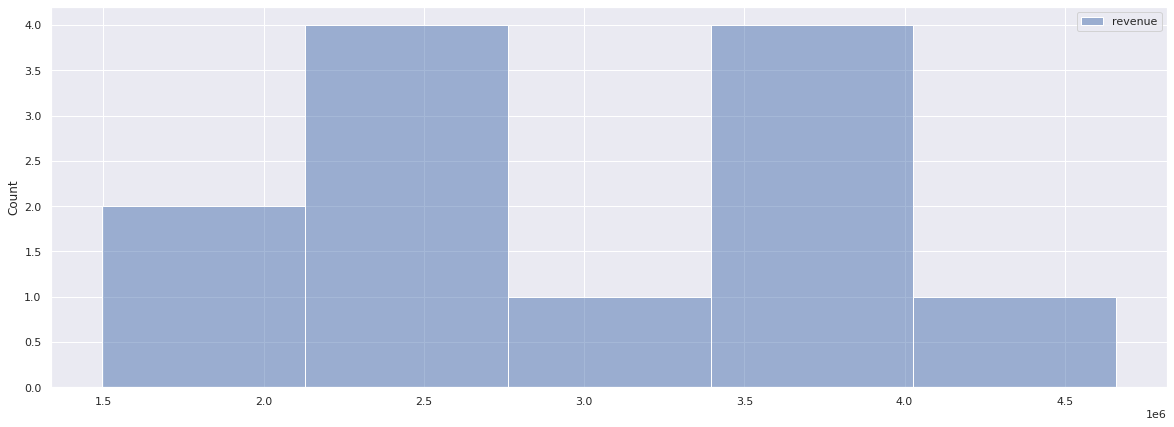

In [ ]:
# plot quarterly data
sns.histplot(quarterly_revenue)

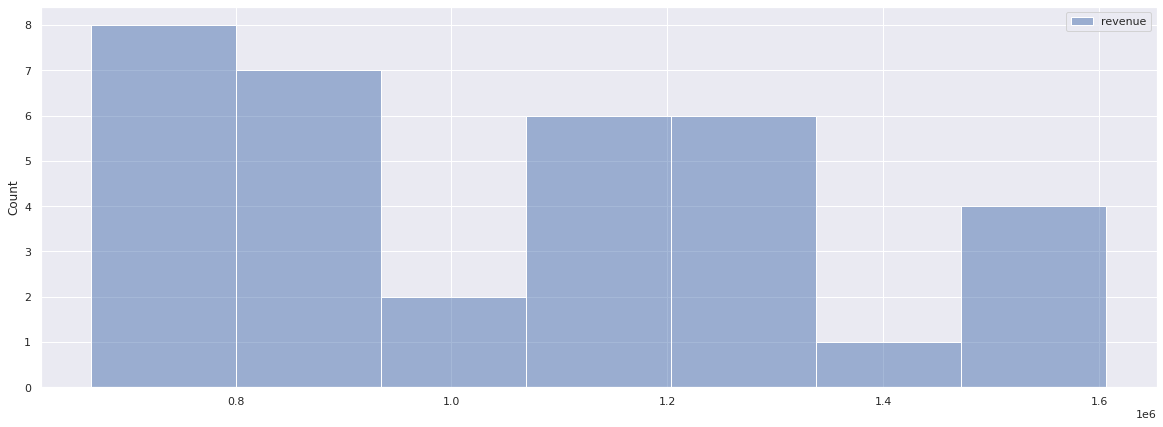

In [ ]:
#plot monthly data
sns.histplot(monthly_revenue_1)

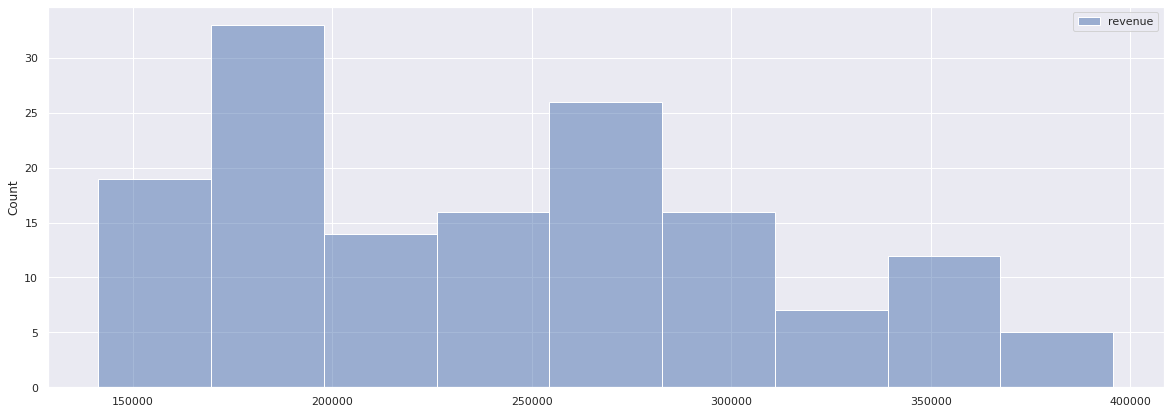

In [ ]:
#plot weekly data
sns.histplot(weekly_revenue)

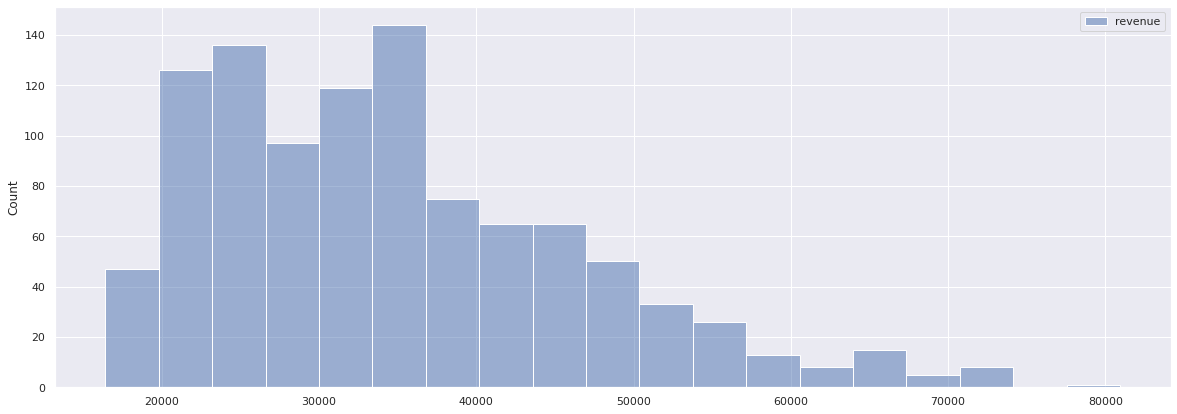

In [ ]:
#plot daily data
sns.histplot(daily_revenue)

**Obseravtion:** The distribution of `quarterly_revenue`, `monthly_revenue`, `weekly_revenue` and `daily_revenue` values do not look like normal distribution. Those squashed distribution of the observations be another indicator of non-stationary time series

#### Augmented Dickey-Fuller Test - Whether that autocorrelation is 1 or greater
Statistical tests make strong assumptions about our data. Whether a time series is stationary or not. Or whether or not there's realy correlation between the current value and some lag value

* **Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series is nonstationary
* **Alternate Hypothesis (H1)**: The null hypothesis is rejected, it suggest the time series is stationary 
  - p_value > threshold 0.05: Fail to reject H0 => data is non-stationary
  - p_value <= threshold 0.05: reject the H0

  ADF
  - The more negative this statistic, the more confident we can be that the series is stationary
  - If the ADF statistic is positive, this means we fail to reject the null hypothesis

##### Run the ADF test on the `daily_revenue` data

In [ ]:
adf_1, pvalue_1, usedlag_1, nobs_1, critical_values_1, icbest_1 = adfuller(daily_revenue, regression='c')
print('ADF: ',adf_1)
print('p_value:',pvalue_1)

ADF:  -1.4733325665130794
p_value: 0.5466596873891053


In [ ]:
print(usedlag_1)

22


In [ ]:
print(nobs_1)

1010


Fail to reject H0

##### Observation: all four dataset are nonstationary and require transformation

### Transform nonstationary time series to stationary time series data

#### Monthly revenue data

##### Remove trend & Seasonality 

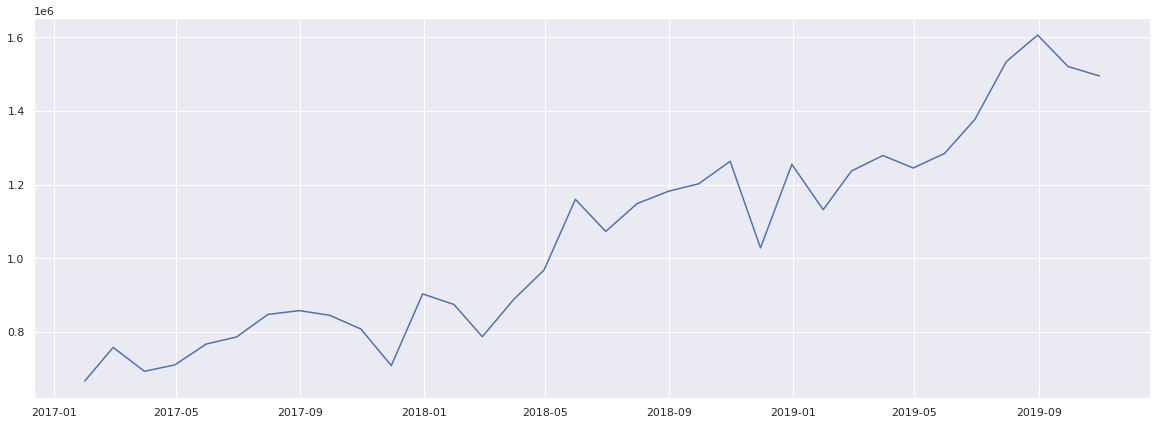

In [ ]:
plt.plot(monthly_revenue_1)

Using decomposition that seasonal decomposed, then we have our trend or seasonality and end up with residuals from our original series

###### Period = 7

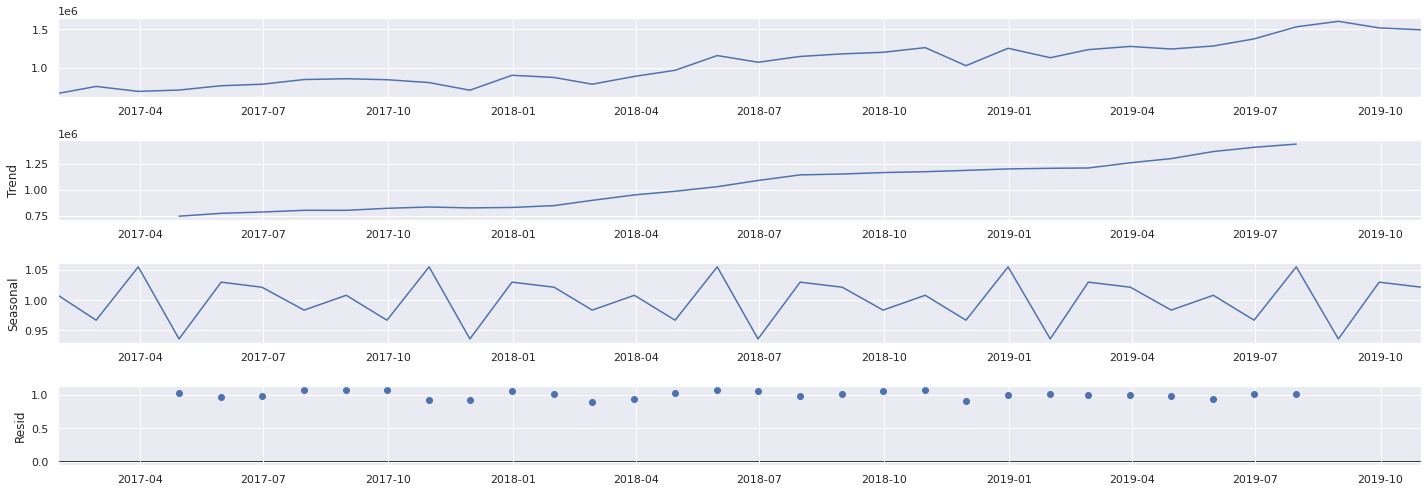

In [ ]:
decompose = seasonal_decompose(monthly_revenue_1, model='multiplicative', period=7)
decompose.plot()
decompose_trend = decompose.trend
decompose_seasonal = decompose.seasonal
decompose_residual = decompose.resid

In [ ]:
print(decompose_residual)

2017-01-31         NaN
2017-02-28         NaN
2017-03-31         NaN
2017-04-30    1.016366
2017-05-31    0.962053
2017-06-30    0.978480
2017-07-31    1.072963
2017-08-31    1.060066
2017-09-30    1.063200
2017-10-31    0.917048
2017-11-30    0.916106
2017-12-31    1.056128
2018-01-31    1.009525
2018-02-28    0.890654
2018-03-31    0.926933
2018-04-30    1.015863
2018-05-31    1.068191
2018-06-30    1.052891
2018-07-31    0.976253
2018-08-31    1.005443
2018-09-30    1.049827
2018-10-31    1.068569
2018-11-30    0.896771
2018-12-31    0.991792
2019-01-31    1.003127
2019-02-28    0.994056
2019-03-31    0.995042
2019-04-30    0.975045
2019-05-31    0.932921
2019-06-30    1.012656
2019-07-31    1.011459
2019-08-31         NaN
2019-09-30         NaN
2019-10-31         NaN
Freq: M, Name: resid, dtype: float64


In [ ]:
decompose_residual = decompose_residual[3:-3]
decompose_residual

2017-04-30    1.016366
2017-05-31    0.962053
2017-06-30    0.978480
2017-07-31    1.072963
2017-08-31    1.060066
2017-09-30    1.063200
2017-10-31    0.917048
2017-11-30    0.916106
2017-12-31    1.056128
2018-01-31    1.009525
2018-02-28    0.890654
2018-03-31    0.926933
2018-04-30    1.015863
2018-05-31    1.068191
2018-06-30    1.052891
2018-07-31    0.976253
2018-08-31    1.005443
2018-09-30    1.049827
2018-10-31    1.068569
2018-11-30    0.896771
2018-12-31    0.991792
2019-01-31    1.003127
2019-02-28    0.994056
2019-03-31    0.995042
2019-04-30    0.975045
2019-05-31    0.932921
2019-06-30    1.012656
2019-07-31    1.011459
Freq: M, Name: resid, dtype: float64

In [ ]:
adf_after_1, pvalue_after_1, usedlag_, nobs_, critical_values_, icbest_ = adfuller(decompose_residual)
print("ADF: ", adf_after_1)
print("p-value: ", pvalue_after_1)

ADF:  -3.6356027280141316
p-value:  0.005115744216104962


period = 7
* ADF:  -3.1429962602897
* p-value:  0.02353061476225177

period = 14
* ADF:  -3.132768489767122
* p-value:  0.024221312287292386

period = 12
* ADF:  1.1485497526886996
* p-value:  0.9956104004314171

###### Period = 2

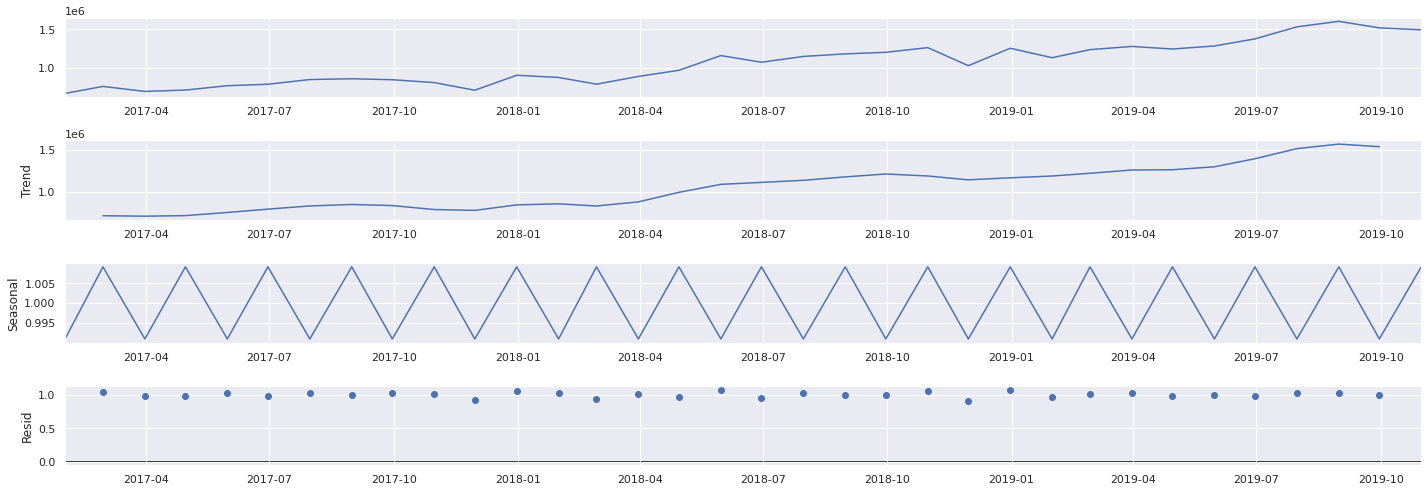

In [ ]:
decom = seasonal_decompose(monthly_revenue_1, model='multiplicative', period=2)
decom.plot()
decom_trend = decom.trend
decom_seasonal = decom.seasonal
decom_residual = decom.resid

In [ ]:
print(decom_residual)

2017-01-31         NaN
2017-02-28    1.044817
2017-03-31    0.980026
2017-04-30    0.977585
2017-05-31    1.021573
2017-06-30    0.977926
2017-07-31    1.024556
2017-08-31    0.997668
2017-09-30    1.016671
2017-10-31    1.010323
2017-11-30    0.914253
2017-12-31    1.056385
2018-01-31    1.026377
2018-02-28    0.934994
2018-03-31    1.015236
2018-04-30    0.963071
2018-05-31    1.073816
2018-06-30    0.954790
2018-07-31    1.018471
2018-08-31    0.993748
2018-09-30    1.000725
2018-10-31    1.052754
2018-11-30    0.907136
2018-12-31    1.065339
2019-01-31    0.960671
2019-02-28    1.003866
2019-03-31    1.024343
2019-04-30    0.976581
2019-05-31    0.998876
2019-06-30    0.979586
2019-07-31    1.023267
2019-08-31    1.015908
2019-09-30    0.999343
2019-10-31         NaN
Freq: M, Name: resid, dtype: float64


In [ ]:
decom_residual = decom_residual[1:-1]
decom_residual

2017-02-28    1.044817
2017-03-31    0.980026
2017-04-30    0.977585
2017-05-31    1.021573
2017-06-30    0.977926
2017-07-31    1.024556
2017-08-31    0.997668
2017-09-30    1.016671
2017-10-31    1.010323
2017-11-30    0.914253
2017-12-31    1.056385
2018-01-31    1.026377
2018-02-28    0.934994
2018-03-31    1.015236
2018-04-30    0.963071
2018-05-31    1.073816
2018-06-30    0.954790
2018-07-31    1.018471
2018-08-31    0.993748
2018-09-30    1.000725
2018-10-31    1.052754
2018-11-30    0.907136
2018-12-31    1.065339
2019-01-31    0.960671
2019-02-28    1.003866
2019-03-31    1.024343
2019-04-30    0.976581
2019-05-31    0.998876
2019-06-30    0.979586
2019-07-31    1.023267
2019-08-31    1.015908
2019-09-30    0.999343
Freq: M, Name: resid, dtype: float64

**ADF Test:** We'll have to remove the first and last three values to run an ADF test since those values are all nan. 

In [ ]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(decom_residual)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -2.8425745882274
p-value:  0.05244492231902743


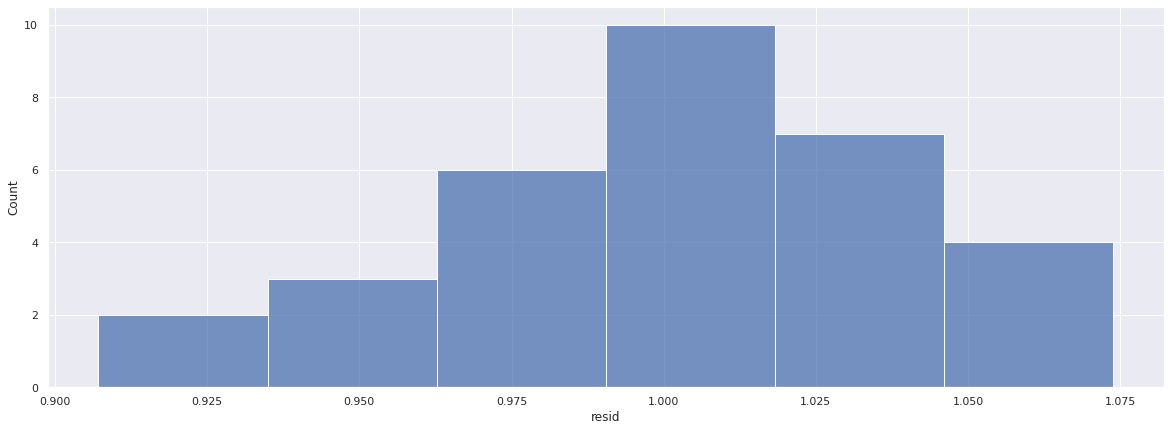

In [ ]:
sns.histplot(decom_residual)

It's stationary

##### Removing Autocorrelation with differencing

monthly_revenue_1.diff(1).plot(figsize=(15,5), title='Monthly Revenue')

In [ ]:
monthly_diff = monthly_revenue_1.diff(1)
monthly_diff

revenue
2017-01-31            NaN
2017-02-28   91228.141723
2017-03-31  -64899.752000
2017-04-30   17504.260138
2017-05-31   56493.668862
2017-06-30   19237.331000
2017-07-31   61273.230000
2017-08-31   10357.370000
2017-09-30  -12575.740000
2017-10-31  -37532.060000
2017-11-30  -99319.840000
2017-12-31  194809.720000
2018-01-31  -28784.740000
2018-02-28  -87432.760000
2018-03-31  101104.950000
2018-04-30   79866.650000
2018-05-31  192137.210277
2018-06-30  -87219.470277
2018-07-31   75518.910000
2018-08-31   33550.130000
2018-09-30   20475.200138
2018-10-31   61037.859862
2018-11-30 -235400.450000
2018-12-31  227078.630138
2019-01-31 -123232.350000
2019-02-28  105301.709862
2019-03-31   41876.660000
2019-04-30  -33923.530000
2019-05-31   39608.610000
2019-06-30   92545.080277
2019-07-31  156731.279723
2019-08-31   72173.700553
2019-09-30  -85344.440553
2019-10-31  -25556.040000

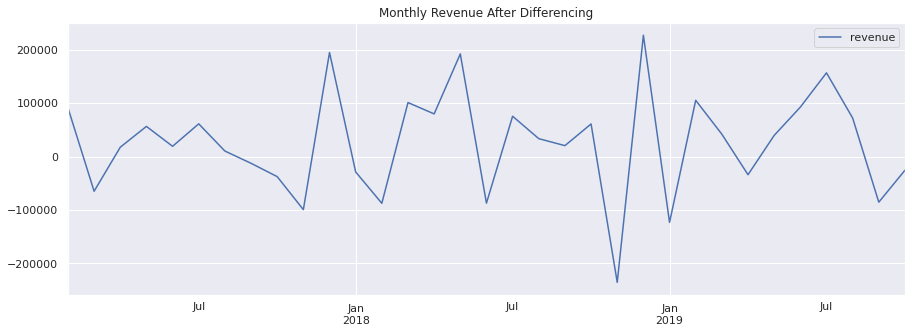

In [ ]:
monthly_diff_1 = monthly_diff[1:]
monthly_diff_1.plot(figsize=(15,5), title='Monthly Revenue After Differencing')

Run ADF one more time,  this time on the differenced data.

In [ ]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(monthly_diff_1)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -4.059367879146474
p-value:  0.0011296381983488756


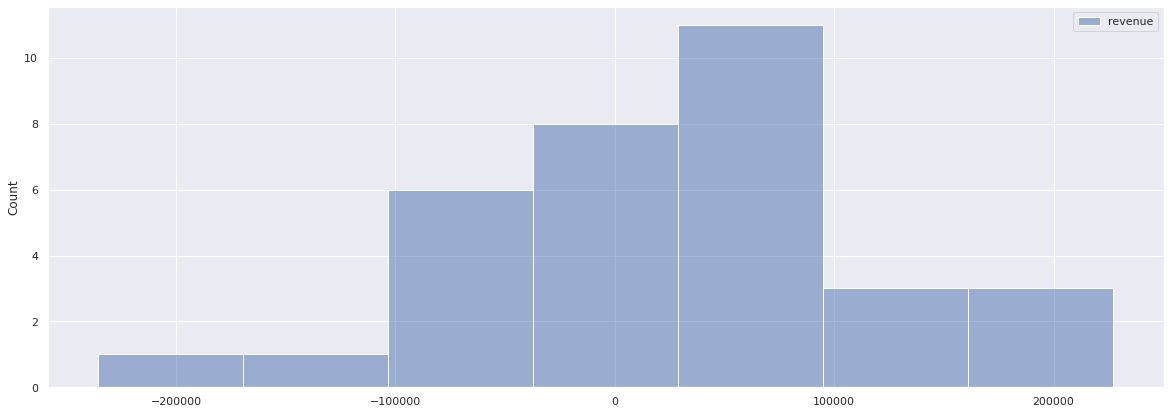

In [ ]:
sns.histplot(monthly_diff_1)

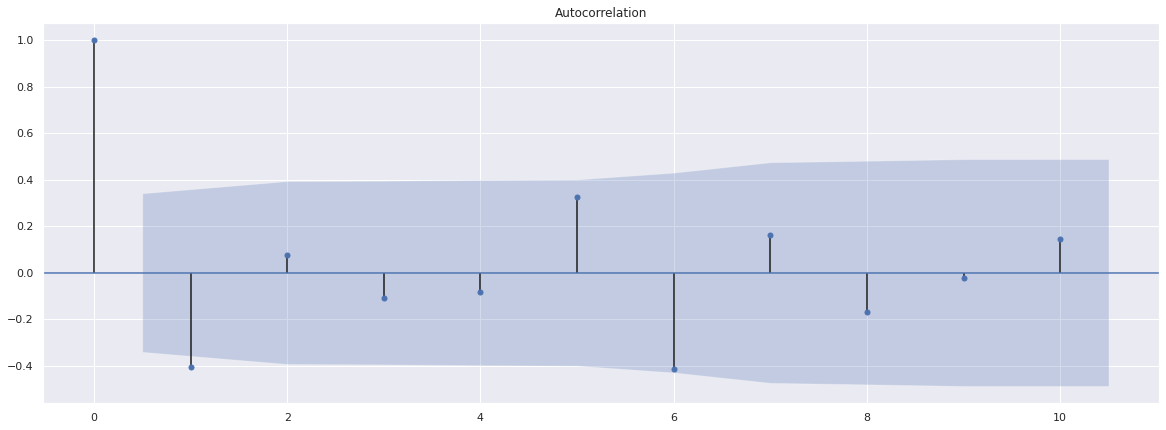

In [ ]:
sm.graphics.tsa.plot_acf(monthly_diff_1, lags=10);

#### daily revenue data

##### Remove trend & Seasonality

###### period = 7

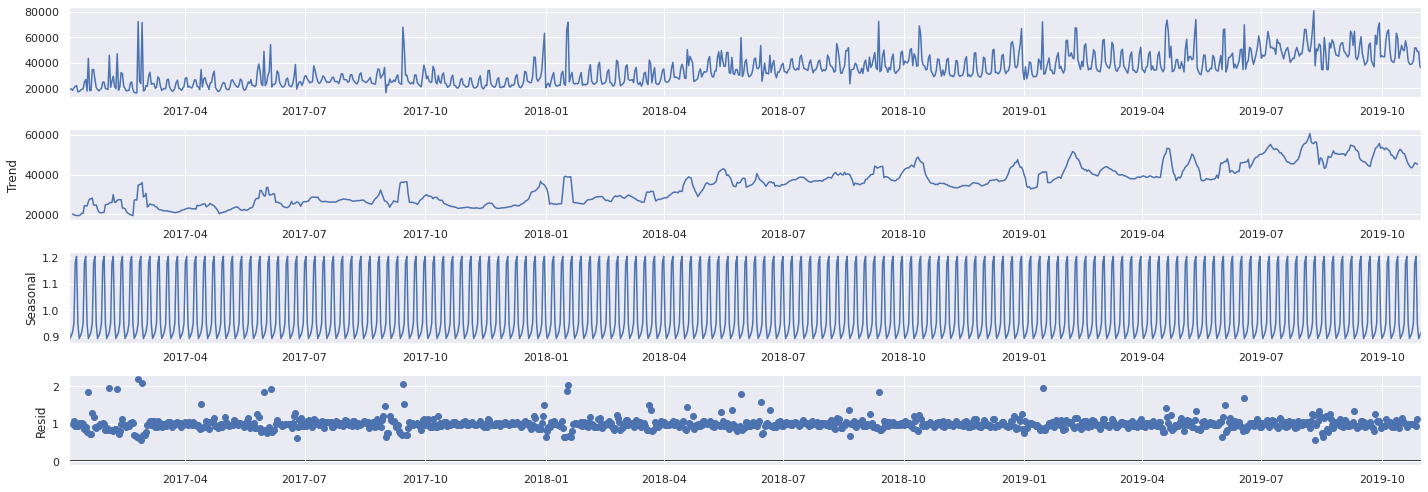

In [ ]:
decom_daily_1 = seasonal_decompose(daily_revenue, model='multiplicative', period=7)
rcParams["figure.figsize"] = 20, 7
decom_daily_1.plot()
decom_daily_trend_1 = decom_daily_1.trend
decom_daily_seasonal_1 = decom_daily_1.seasonal
decom_daily_resid_1 = decom_daily_1.resid

In [ ]:
print(decom_daily_resid_1)

2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05    0.997595
2017-01-06    1.085258
                ...   
2019-10-27    0.940708
2019-10-28    1.138369
2019-10-29         NaN
2019-10-30         NaN
2019-10-31         NaN
Freq: D, Name: resid, Length: 1033, dtype: float64


In [ ]:
decom_daily_resid_1 = decom_daily_resid_1[3:-3]
decom_daily_resid_1

2017-01-05    0.997595
2017-01-06    1.085258
2017-01-07    0.933358
2017-01-08    0.947139
2017-01-09    0.934379
                ...   
2019-10-24    0.987699
2019-10-25    0.988800
2019-10-26    0.956659
2019-10-27    0.940708
2019-10-28    1.138369
Freq: D, Name: resid, Length: 1027, dtype: float64

In [ ]:
adf_after_daily_1, pvalue_after_daily_1, usedlag_, nobs_, critical_values_, icbest_ = adfuller(decom_daily_resid_1)
print("ADF: ", adf_after_daily_1)
print("p-value: ", pvalue_after_daily_1)

ADF:  -8.021603657389305
p-value:  2.0691903964371306e-12


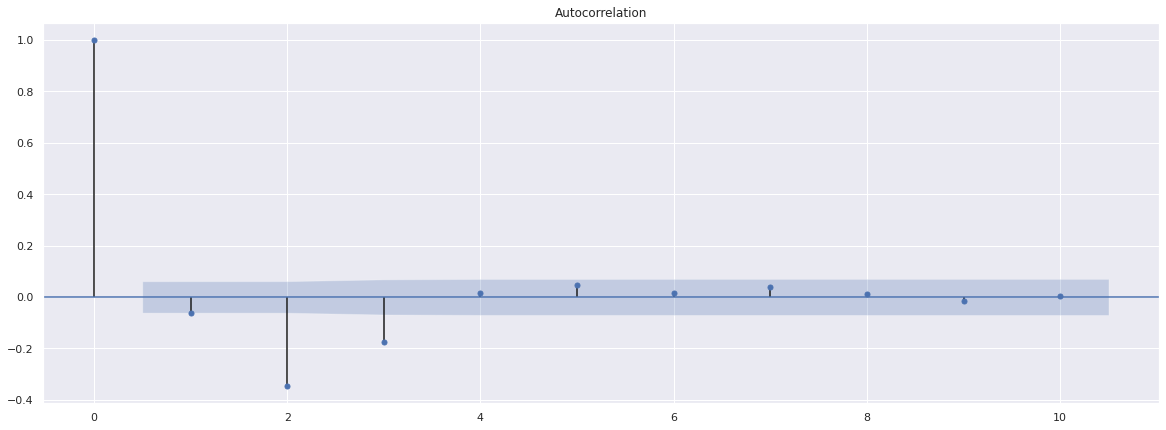

In [ ]:
sm.graphics.tsa.plot_acf(decom_daily_resid_1, lags=10);

##### Removing Autocorrelation with differencing

In [ ]:
daily_diff = daily_revenue.diff(1)
daily_diff 

revenue
2017-01-02       NaN
2017-01-03  -1023.71
2017-01-04    629.84
2017-01-05  -1154.11
2017-01-06   1955.37
...              ...
2019-10-27    -37.86
2019-10-28  -2917.62
2019-10-29     41.00
2019-10-30 -11779.19
2019-10-31  -1005.67

[1033 rows x 1 columns]

In [ ]:
daily_diff = daily_diff[1:]
daily_diff

revenue
2017-01-03  -1023.71
2017-01-04    629.84
2017-01-05  -1154.11
2017-01-06   1955.37
2017-01-07   1109.09
...              ...
2019-10-27    -37.86
2019-10-28  -2917.62
2019-10-29     41.00
2019-10-30 -11779.19
2019-10-31  -1005.67

[1032 rows x 1 columns]

In [ ]:
adf_diff, pvalue_diff, usedlag_, nobs_, critical_values_, icbest_ = adfuller(daily_diff)
print("ADF: ", adf_diff)
print("p-value: ", pvalue_diff)

ADF:  -11.33935795794217
p-value:  1.064007512208738e-20


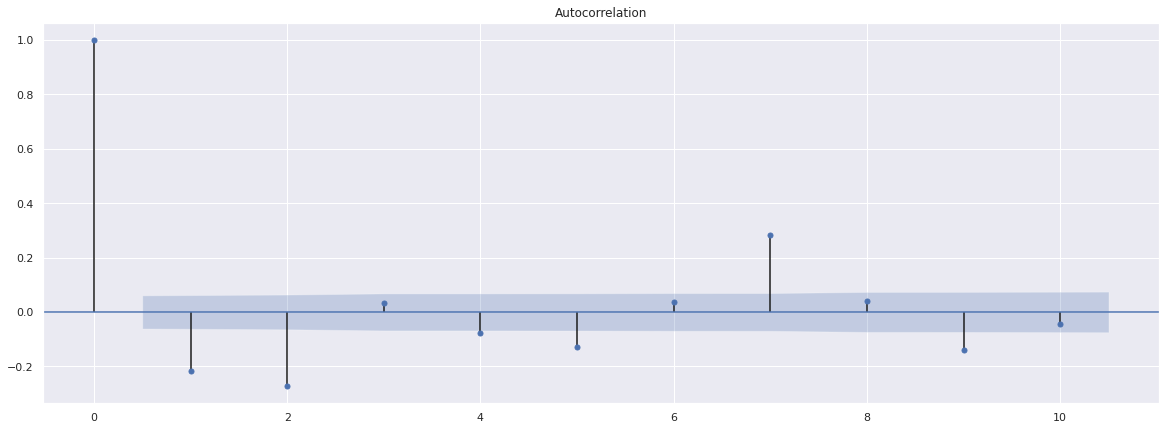

In [ ]:
sm.graphics.tsa.plot_acf(daily_diff, lags=10);

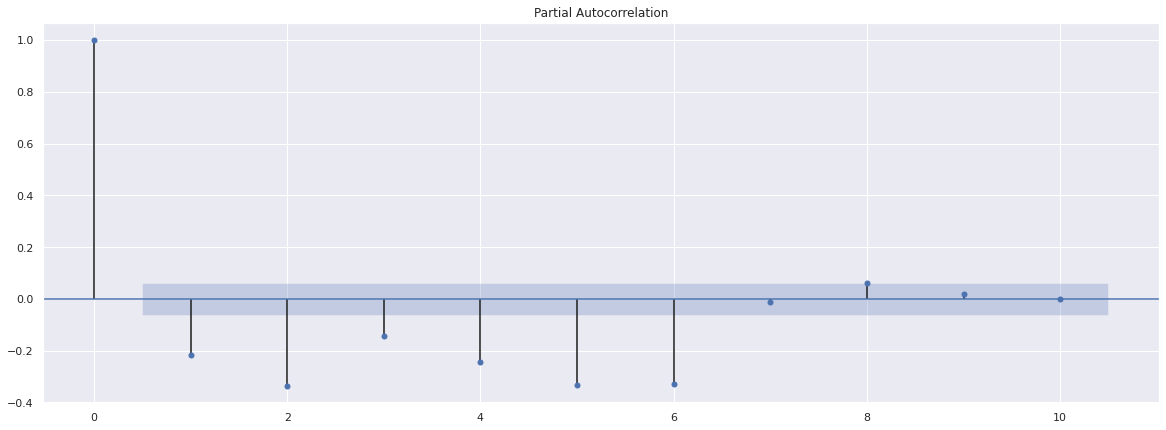

In [ ]:
sm.graphics.tsa.plot_pacf(daily_diff, lags=10);

# Exponential smoothing or Triple Exponential

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# metric
from sklearn.metrics import mean_squared_error, r2_score

## `daily_revenue` data

In [ ]:
series = daily_revenue.revenue
series

2017-01-02    20054.35
2017-01-03    19030.64
2017-01-04    19660.48
2017-01-05    18506.37
2017-01-06    20461.74
                ...   
2019-10-27    51751.19
2019-10-28    48833.57
2019-10-29    48874.57
2019-10-30    37095.38
2019-10-31    36089.71
Freq: D, Name: revenue, Length: 1033, dtype: float64

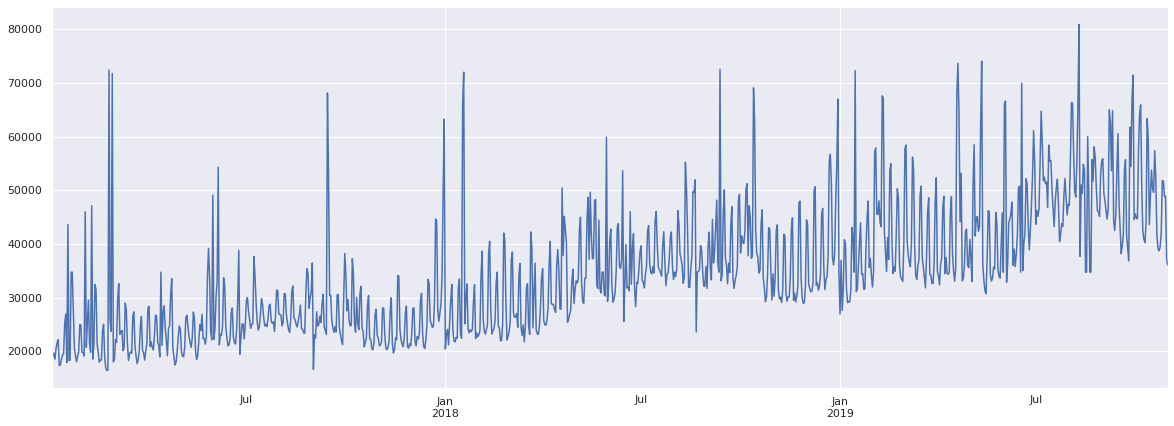

In [ ]:
series.plot()

In [ ]:
# from 
series[0:880]

2017-01-02    20054.35
2017-01-03    19030.64
2017-01-04    19660.48
2017-01-05    18506.37
2017-01-06    20461.74
                ...   
2019-05-27    35273.13
2019-05-28    33997.02
2019-05-29    33625.76
2019-05-30    39819.97
2019-05-31    45784.03
Freq: D, Name: revenue, Length: 880, dtype: float64

In [ ]:
series[941:]

2019-08-01    47202.13
2019-08-02    55320.90
2019-08-03    66380.99
2019-08-04    66250.19
2019-08-05    57009.83
                ...   
2019-10-27    51751.19
2019-10-28    48833.57
2019-10-29    48874.57
2019-10-30    37095.38
2019-10-31    36089.71
Freq: D, Name: revenue, Length: 92, dtype: float64

In [ ]:
train = series[0:941]

In [ ]:
# test on the last 3 months
test = series[941:]

In [ ]:
len(train)+len(test)-1

1032

In [ ]:
len(series) - 1

1032

In [ ]:
ex_model = ExponentialSmoothing(
    train,
    seasonal_periods=7,
    trend="additive",
    seasonal="additive",
    use_boxcox=True, 
    initialization_method="estimated", 
).fit() 

pred = ex_model.predict(start=len(train),end=len(series)-1)

In [ ]:
print(f'R-squared = {r2_score(test,pred):.4f}')

# Print Mean Squared Error (1 point)
print(f'MSE       = {mean_squared_error(test,pred):.2f}')

R-squared = 0.1483
MSE       = 74889798.04


Text(0.5, 1.0, 'smoothing of daily dataset')

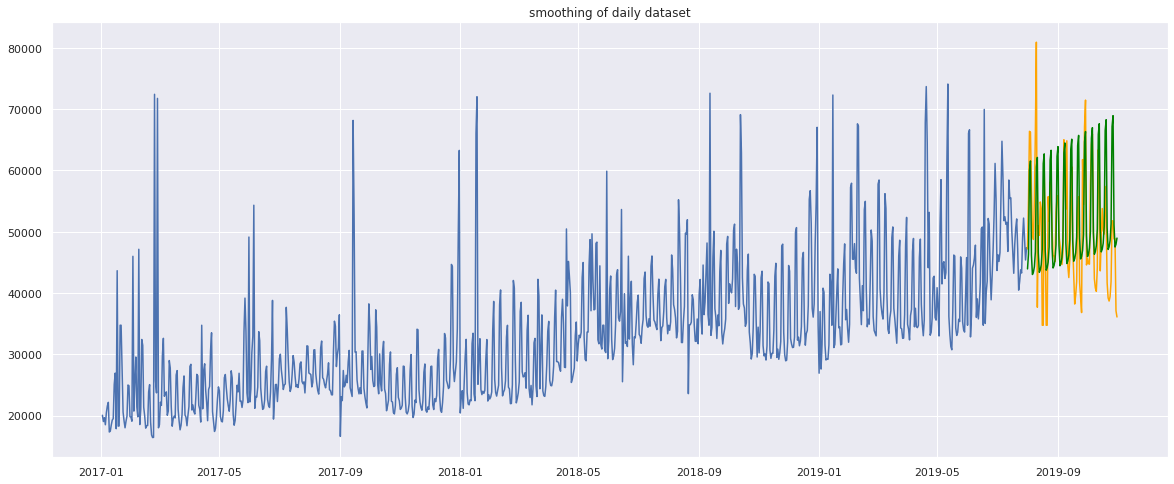

In [ ]:
plt.subplots(figsize=(20, 8))
plt.plot(train,label="train")
plt.plot(test,label="test",color='orange')
plt.plot(pred, color='green',label="predictions")
plt.title('smoothing of daily dataset')

# ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

## `daily_revenue`

In [ ]:
model = ARIMA(train, order=(0,1,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  941
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -9725.214
Date:                Wed, 12 Oct 2022   AIC                          19458.427
Time:                        13:39:38   BIC                          19477.811
Sample:                    01-02-2017   HQIC                         19465.816
                         - 07-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5737      0.021    -27.254      0.000      -0.615      -0.532
ma.L2         -0.4236      0.031    -13.854      0.000      -0.484      -0.364
ma.L3          0.0555      0.026      2.141      0.0

In [ ]:
pred_ARIMA = model_fit.predict(start=len(train),end=len(series)-1)

In [ ]:
print(f'R-squared = {r2_score(test,pred_ARIMA):.4f}')

# Print Mean Squared Error (1 point)
print(f'MSE       = {mean_squared_error(test,pred_ARIMA):.2f}')

R-squared = -0.0653
MSE       = 93674451.03


Text(0.5, 1.0, 'ARIMA of daily dataset')

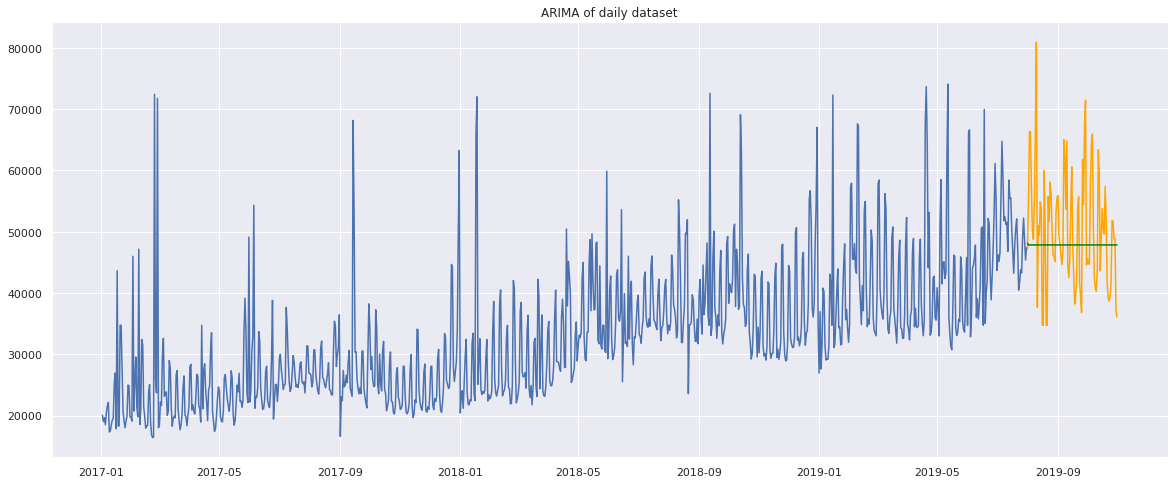

In [ ]:
plt.subplots(figsize=(20, 8))
plt.plot(train,label="train")
plt.plot(test,label="test",color='orange')
plt.plot(pred_ARIMA, color='green',label="predictions")
plt.title('ARIMA of daily dataset')

# Auto ARIMA

In [ ]:
!pip install -U statsmodels prophet pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 19.3 MB/s 
     |████████████████████████████████| 1.9 MB 46.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pmdarima as pm

In [ ]:
model_1 = pm.auto_arima(train, seasonal=False)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  941
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -9720.030
Date:                Wed, 12 Oct 2022   AIC                          19450.059
Time:                        13:40:29   BIC                          19474.289
Sample:                    01-02-2017   HQIC                         19459.296
                         - 07-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     28.8674     10.520      2.744      0.006       8.249      49.486
ma.L1         -0.5766      0.019    -29.645      0.000      -0.615      -0.538
ma.L2         -0.4315      0.027    -16.169      0.000      -0.484      -0.379
ma.L3          0.0460      0.023      2.032      0.042       0.002       0.090
sigma2      5.591e+07   5.36e-05   1.04e+12      0.000    5.59e+07    5.59e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2632.84
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             1.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.08e+26. Standard errors may be unstable.
"""

In [ ]:
pred_1 = model_1.predict(test.shape[0])

Text(0.5, 1.0, 'Auto ARIMA of daily dataset')

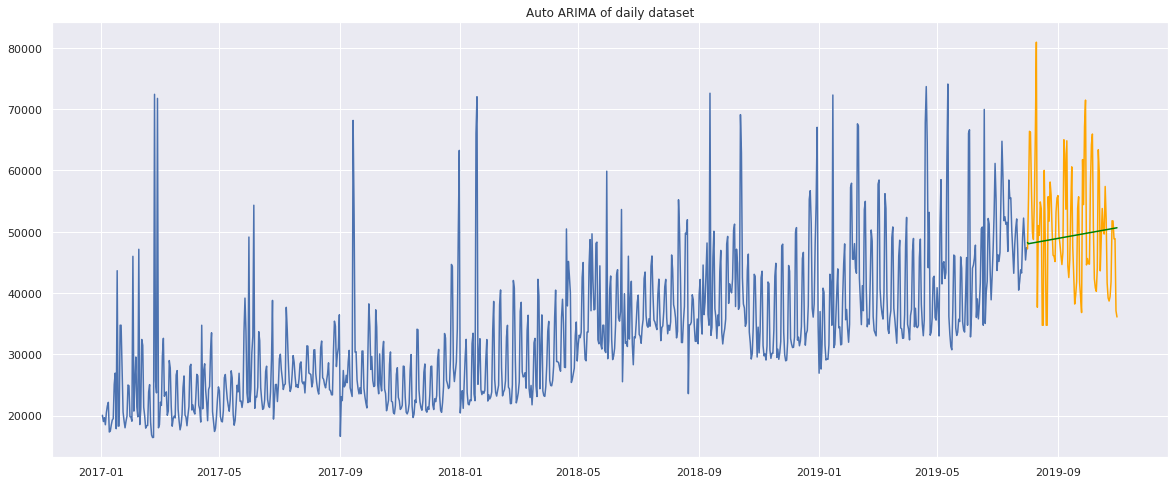

In [ ]:
plt.subplots(figsize=(20, 8))
plt.plot(train,label="train")
plt.plot(test,label="test",color='orange')
plt.plot(pred_1, color='green',label="predictions")
plt.title('Auto ARIMA of daily dataset')

# SARIMA

## `daily_revenue` data

In [ ]:
sarima_model = pm.auto_arima(train, seasonal=True, m=7)
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  941
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -9645.332
Date:                           Wed, 12 Oct 2022   AIC                          19300.665
Time:                                   13:42:55   BIC                          19324.894
Sample:                               01-02-2017   HQIC                         19309.901
                                    - 07-31-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.5483      5.418     -1.209      0.227     -17.167       4.070
ma.L1         -0.6601      0.015    -44.331      0.000      -0.689      -0.631
ar.S.L7        0.9815      0.012     81.677      0.000       0.958       1.005
ma.S.L7       -0.9181      0.033    -27.614      0.000      -0.983      -0.853
sigma2      4.914e+07   2.41e-05   2.04e+12      0.000    4.91e+07    4.91e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.68   Jarque-Bera (JB):              7916.79
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             2.22
Prob(H) (two-sided):                  0.07   Kurtosis:                        16.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.63e+26. Standard errors may be unstable.
"""

In [ ]:
sarima_pred = sarima_model.predict(test.shape[0])

Text(0.5, 1.0, 'Auto ARIMA of daily dataset')

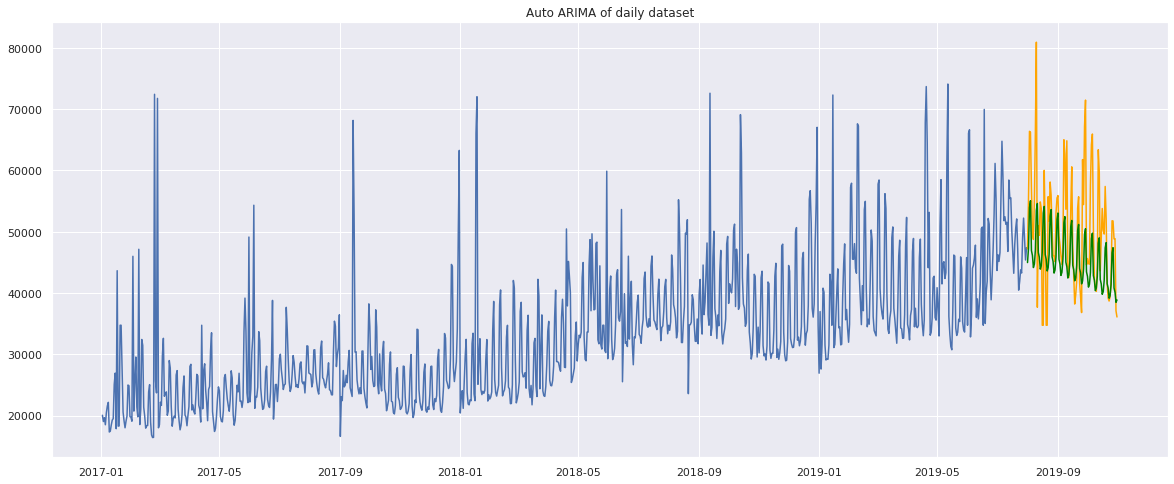

In [ ]:
plt.subplots(figsize=(20, 8))
plt.plot(train,label="train")
plt.plot(test,label="test",color='orange')
plt.plot(sarima_pred, color='green',label="predictions")
plt.title('Auto ARIMA of daily dataset')

# Prophet

In [ ]:
from prophet import Prophet

In [ ]:
train_pro = daily_revenue[:'2019-01-01']
test_pro = daily_revenue['2019-01-01':]

In [ ]:
prophet_train = pd.DataFrame({
    'ds': train_pro.index,
    'y': train_pro.revenue # cột revenue
})

prophet_test = pd.DataFrame({
    'ds': test_pro.index,
    'y': test_pro.revenue
})

In [ ]:
prophet_model = Prophet()
prophet_model.fit(prophet_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjlhikons/dl2t68_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjlhikons/k0mvi2by.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81748', 'data', 'file=/tmp/tmpjlhikons/dl2t68_g.json', 'init=/tmp/tmpjlhikons/k0mvi2by.json', 'output', 'file=/tmp/tmpjlhikons/prophet_model0mghbw0m/prophet_model-20221012134611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:46:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:46:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
prophet_pred = prophet_test[['ds']]
prophet_pred = prophet_model.predict(prophet_pred)
prophet_pred.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2019-01-01  40877.915321  28164.738015  44476.291521  40877.915321   
1 2019-01-02  40907.558735  30071.243476  47325.557692  40907.558735   
2 2019-01-03  40937.202149  29870.073501  47235.162132  40937.202149   
3 2019-01-04  40966.845563  30994.793073  47749.420691  40966.845563   
4 2019-01-05  40996.488977  37617.442860  54162.313909  40996.488977   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  40877.915321    -3913.793474          -3913.793474          -3913.793474   
1  40907.558735    -2226.244883          -2226.244883          -2226.244883   
2  40937.202149    -2109.489713          -2109.489713          -2109.489713   
3  40966.845563    -1692.497767          -1692.497767          -1692.497767   
4  40996.488977     5325.457768           5325.457768           5325.457768   

        weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0 -3913.793474  -3913.793474  -3913.793474                   0.0   
1 -2226.244883  -2226.244883  -2226.244883                   0.0   
2 -2109.489713  -2109.489713  -2109.489713                   0.0   
3 -1692.497767  -1692.497767  -1692.497767                   0.0   
4  5325.457768   5325.457768   5325.457768                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  36964.121847  
1                         0.0                         0.0  38681.313852  
2                         0.0                         0.0  38827.712435  
3                         0.0                         0.0  39274.347795  
4                         0.0                         0.0  46321.946745

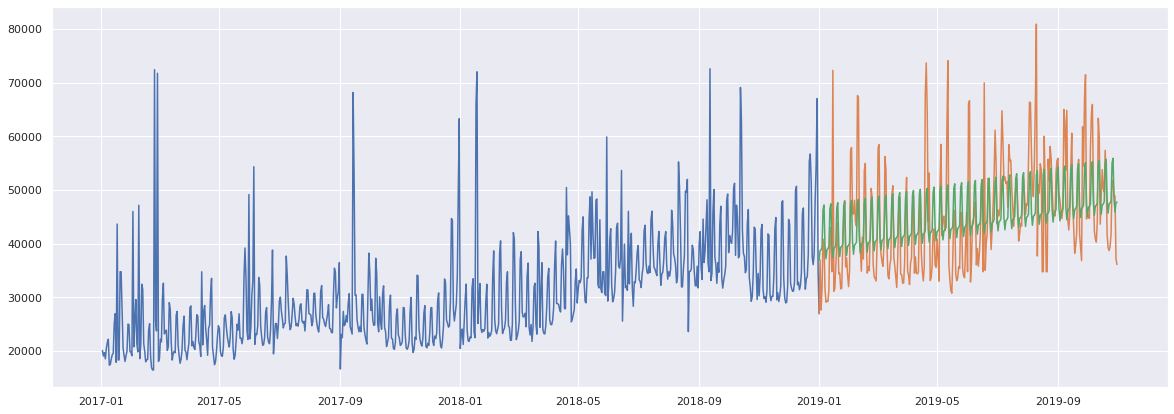

In [ ]:
plt.plot(prophet_train.ds, prophet_train.y, label='Train')
plt.plot(prophet_test.ds, prophet_test.y, label='Test')
plt.plot(prophet_pred.ds, prophet_pred.yhat, label='Pred')
